In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

data = pd.read_csv('train.csv')

In [3]:
data.shape

(1460, 81)

In [4]:
data.columns

Index(['Id', 'BuildingCategory', 'ZoningClassification', 'StreetLineLength',
       'ParcelSize', 'RoadAccessType', 'AlleyAccessType', 'ParcelShape',
       'TerrainFlatness', 'UtilityAvailability', 'ParcelSettings',
       'TerrainSlope', 'District', 'RoadProximity1', 'RoadProximity2',
       'DwellingType', 'DwellingStyle', 'MaterialQuality', 'ConditionRating',
       'ConstructionYear', 'RenovationYear', 'RoofType', 'RoofMaterial',
       'ExteriorCladding1', 'ExteriorCladding2', 'MasonryType', 'MasonrySize',
       'ExteriorQuality', 'ExteriorCondition', 'FoundationType',
       'BasementHeight', 'BasementCondition', 'BasementAccess',
       'BasementFinish1', 'BasementFinishedArea1', 'BasementFinish2',
       'BasementFinishedArea2', 'BasementUnfinishedArea', 'TotalBasementArea',
       'HeatingType', 'HeatingQuality', 'AirConditioning', 'ElectricalSystem',
       'GroundFloorArea', 'UpperFloorArea', 'LowQualityArea', 'LivingArea',
       'BasementFullBathrooms', 'BasementHalfBath

In [5]:
X = data.drop('OutcomeVariable', axis=1)
y = data['OutcomeVariable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [6]:
train_data.shape

(1168, 81)

**نلاحظ وجود عمود يحوي على قيم مفقودة بنسبة ١٠٠% ويستحسن ازالتته 
سوف نقوم بدراسة ارتباطات العواميد المتبقية و مدى تأثيرها على الخرج و تعبئتها بما يناسب العواميد المرتبط بها**

In [7]:

X_train = train_data.drop('OutcomeVariable', axis=1)
y_train = train_data['OutcomeVariable']

numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns


In [8]:
numerical_summary = X_train.describe()
print(numerical_summary)

# Summary statistics for categorical features
categorical_summary = X_train.describe(include=['object'])
print(categorical_summary)


                Id  BuildingCategory  StreetLineLength     ParcelSize  \
count  1168.000000       1168.000000        951.000000    1168.000000   
mean    730.904966         56.849315         70.343849   10689.642123   
std     425.369088         42.531862         24.897021   10759.366198   
min       1.000000         20.000000         21.000000    1300.000000   
25%     360.750000         20.000000         59.000000    7587.250000   
50%     732.500000         50.000000         70.000000    9600.000000   
75%    1101.750000         70.000000         80.000000   11700.000000   
max    1460.000000        190.000000        313.000000  215245.000000   

       MaterialQuality  ConditionRating  ConstructionYear  RenovationYear  \
count      1168.000000      1168.000000       1168.000000     1168.000000   
mean          6.121575         5.584760       1970.965753     1984.897260   
std           1.367619         1.116062         30.675495       20.733955   
min           1.000000         1.0

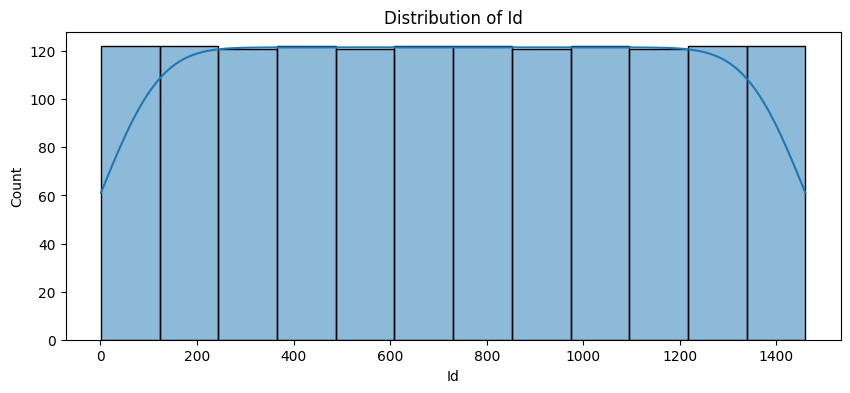

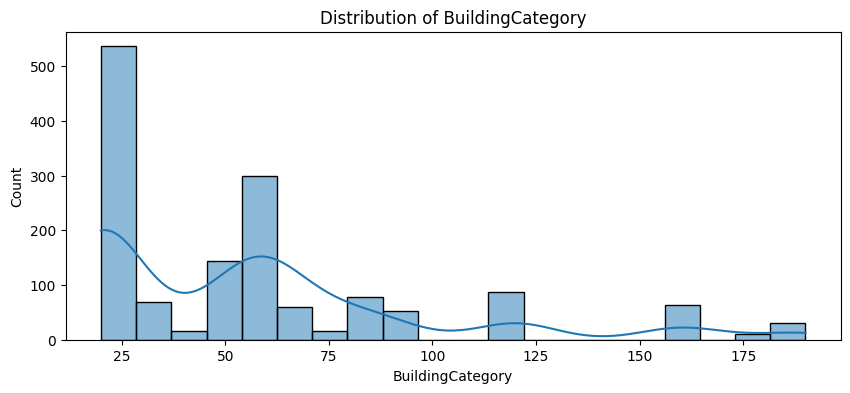

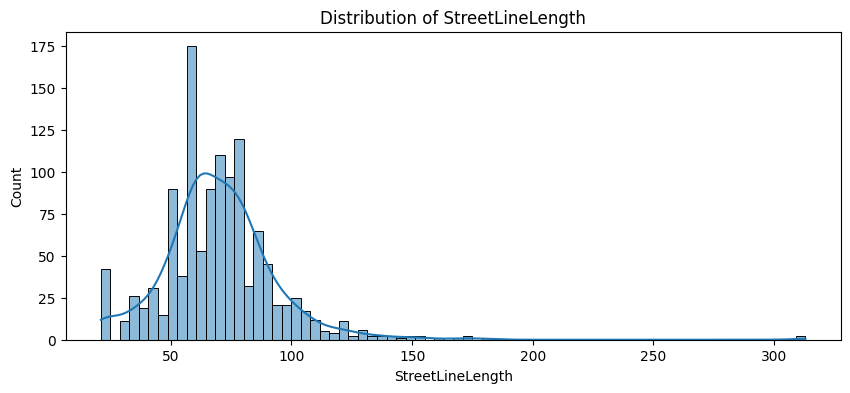

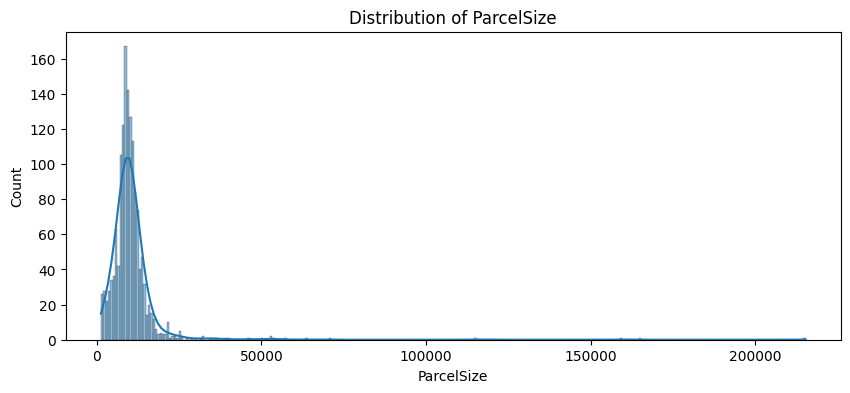

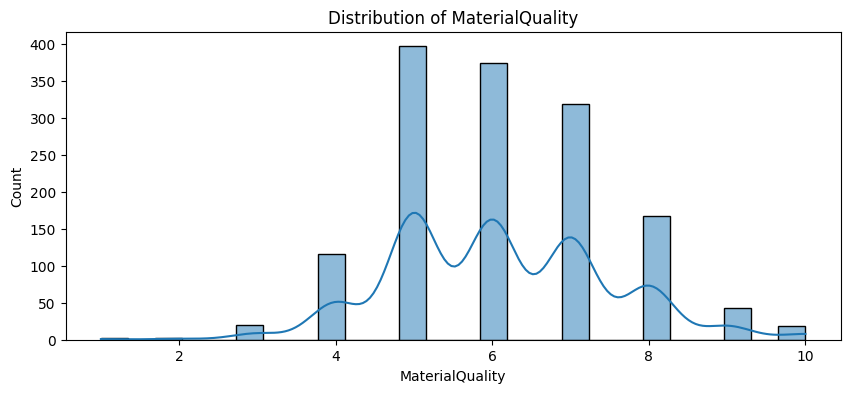

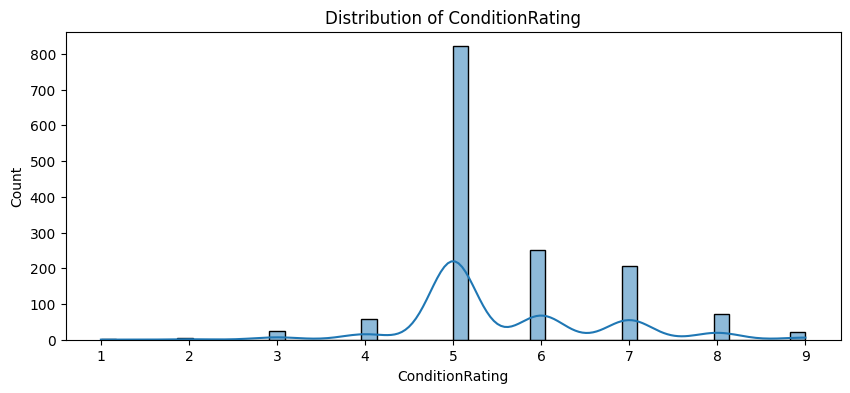

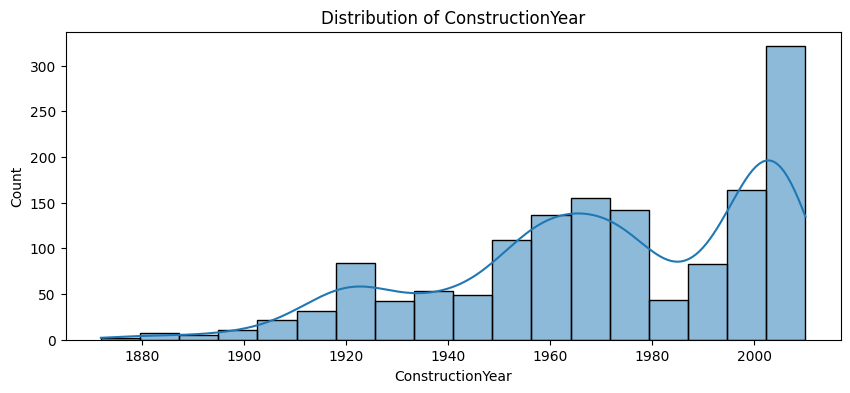

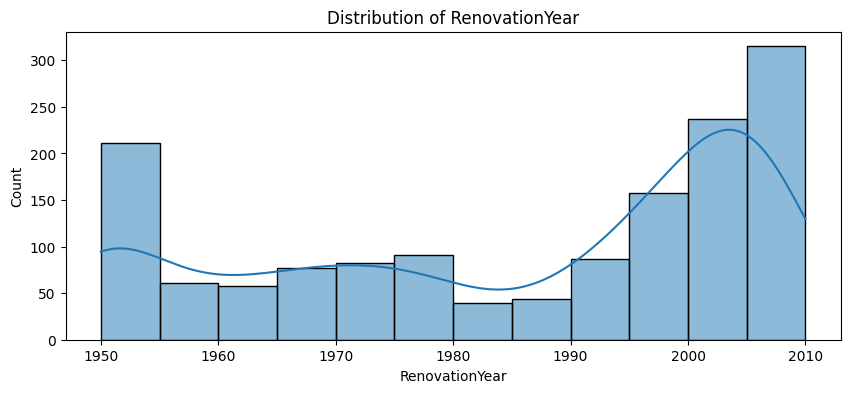

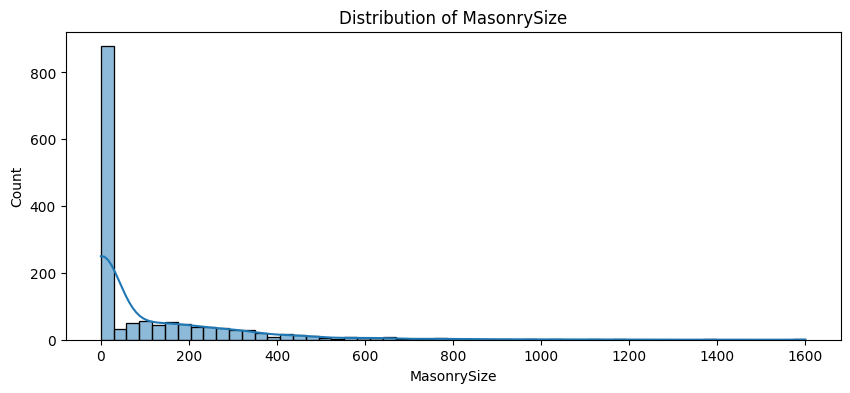

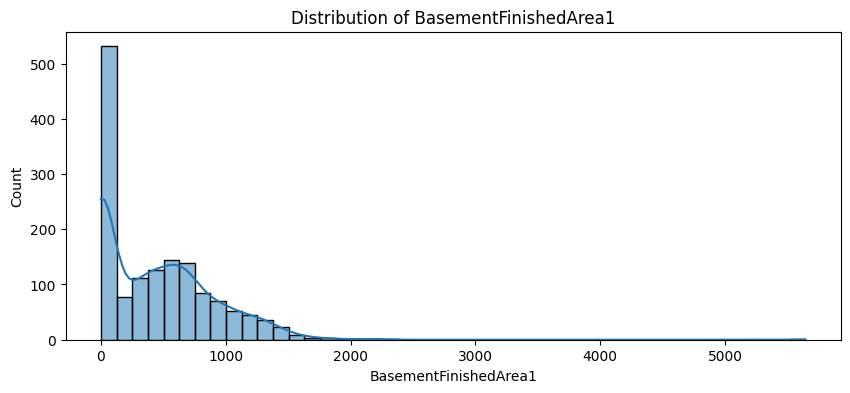

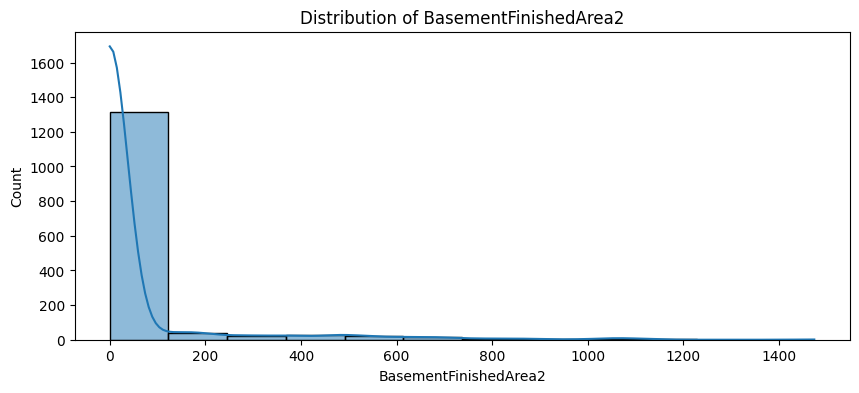

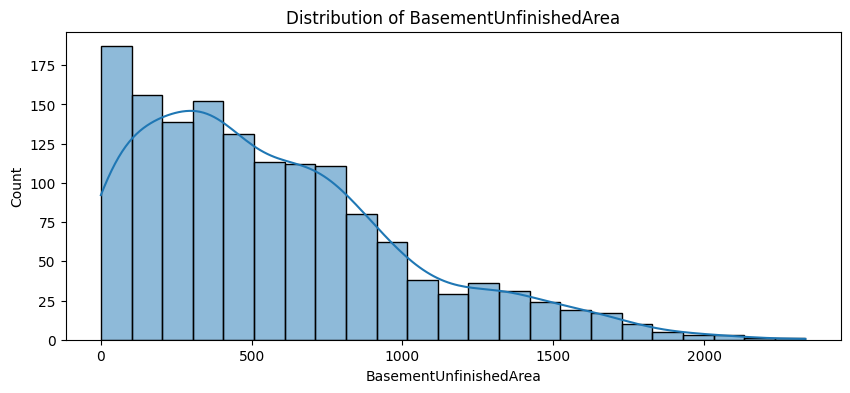

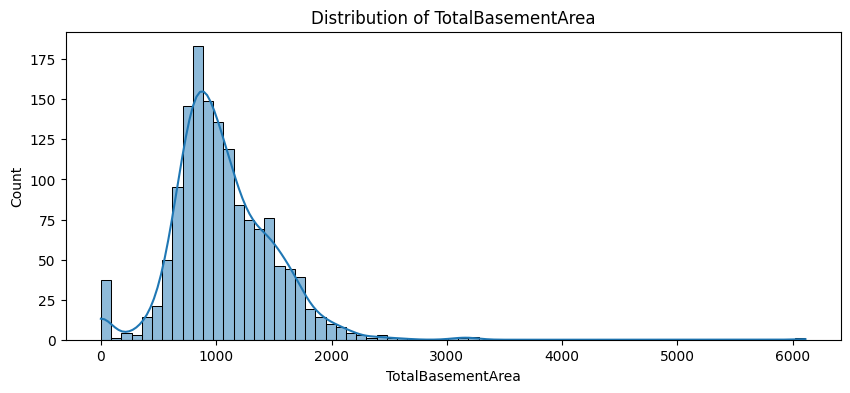

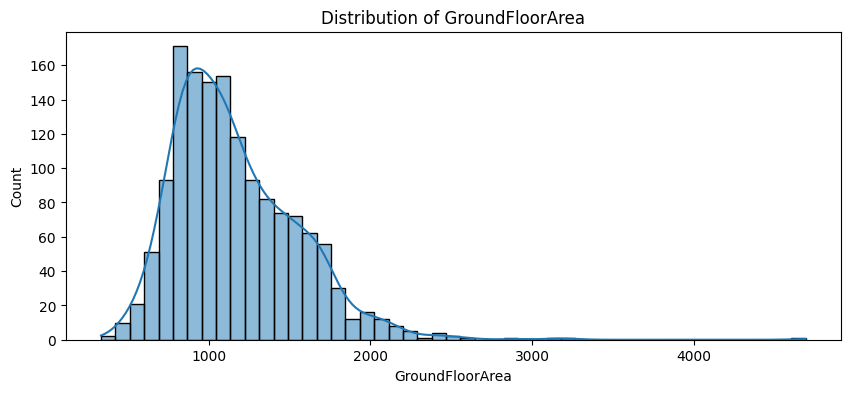

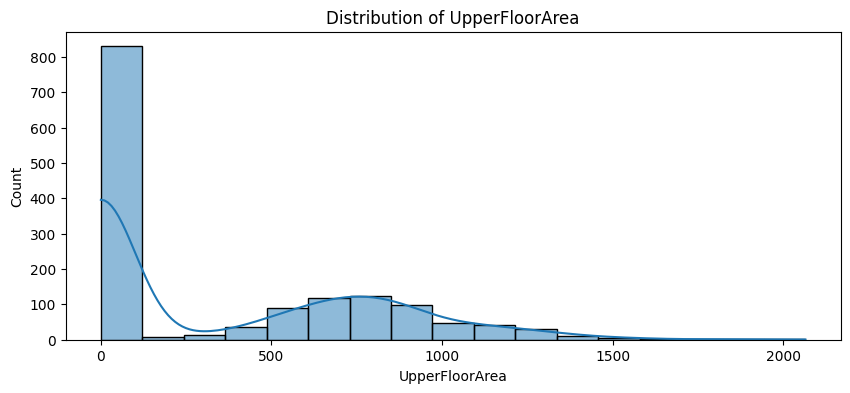

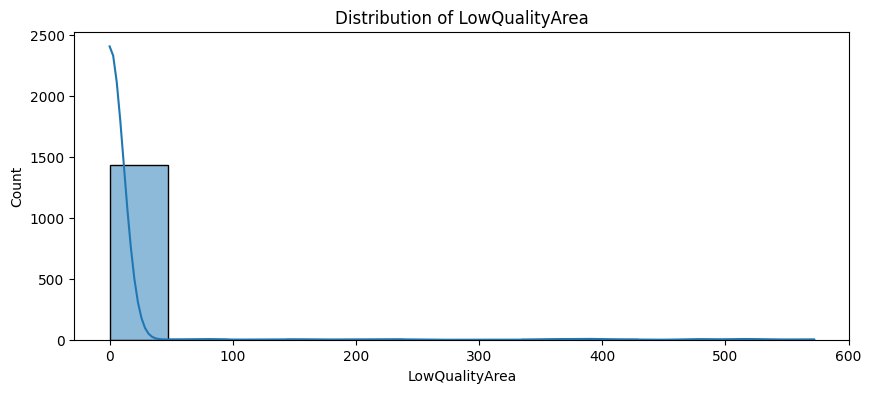

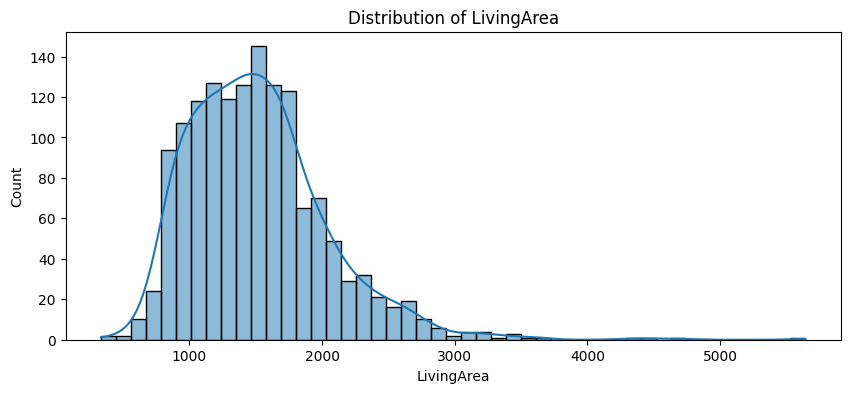

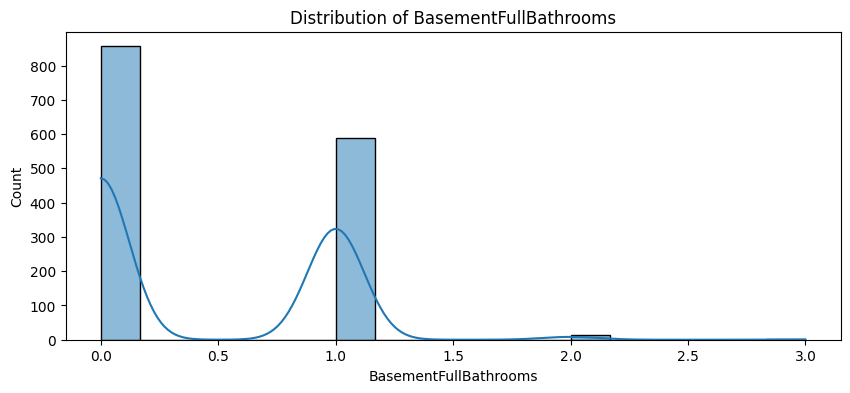

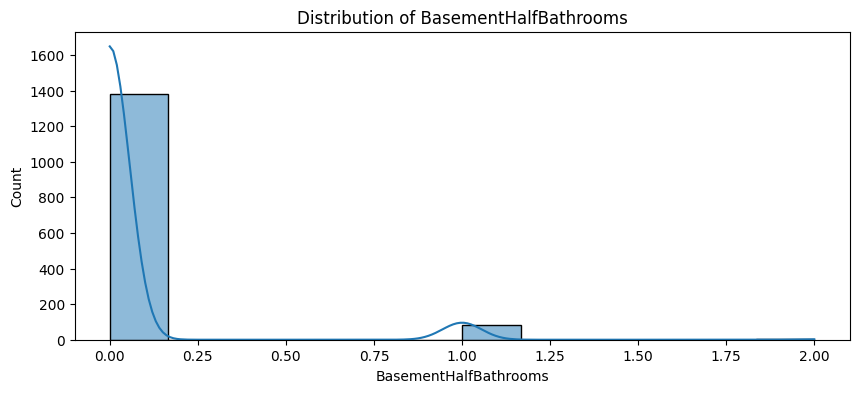

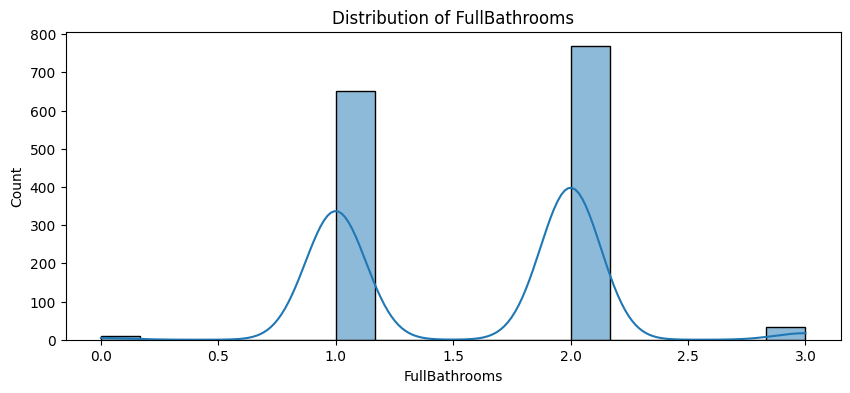

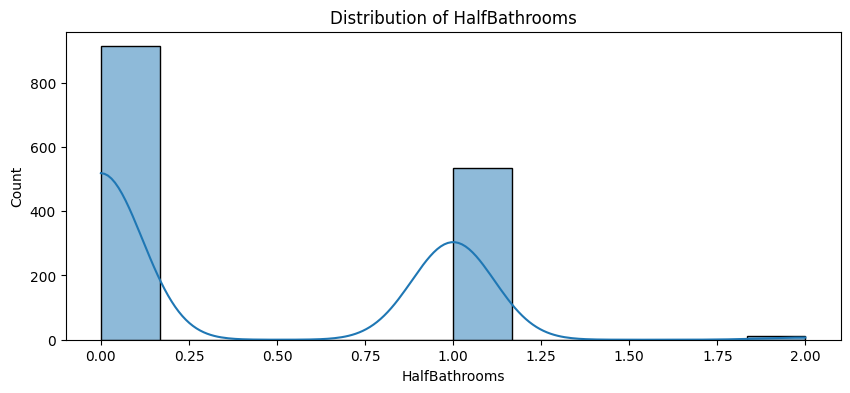

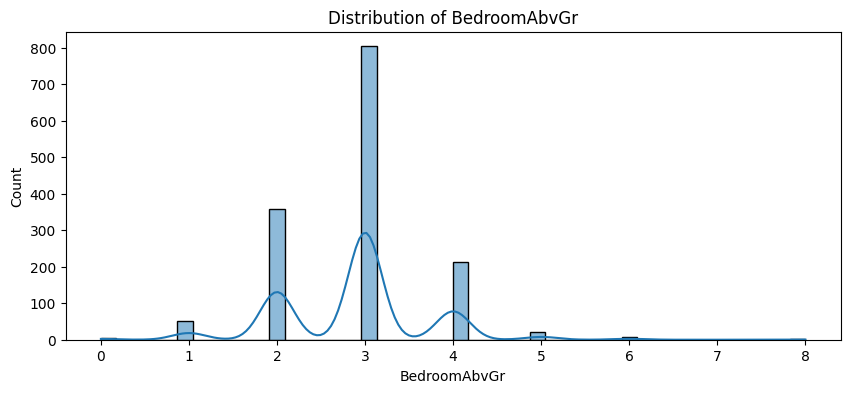

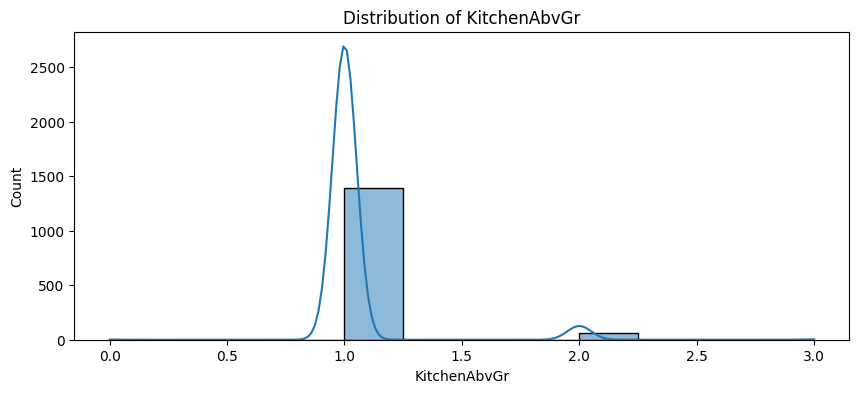

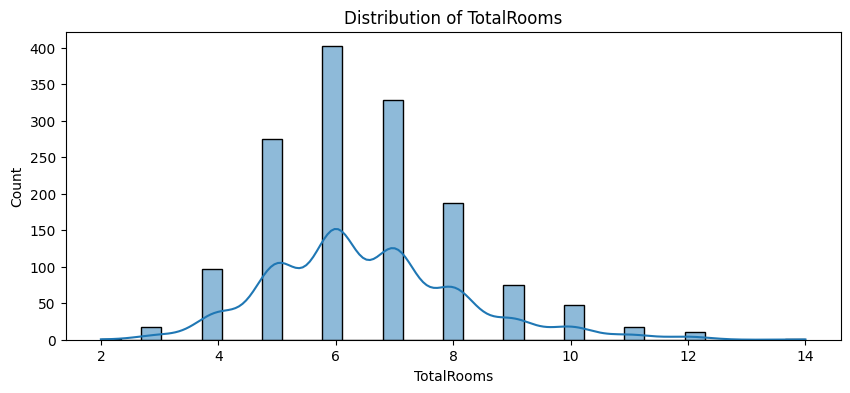

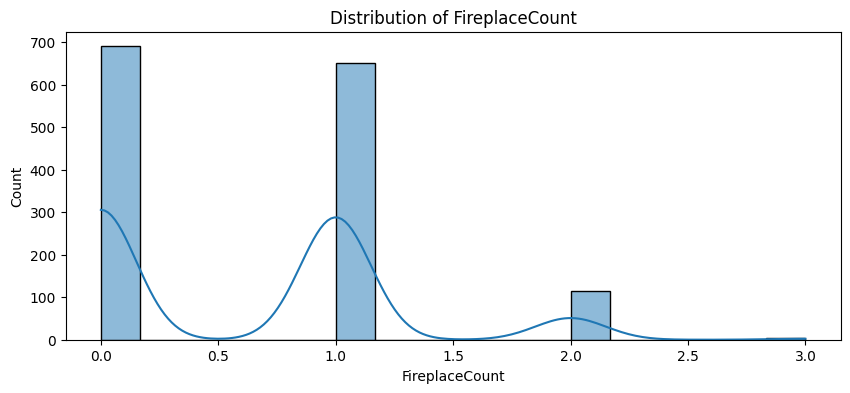

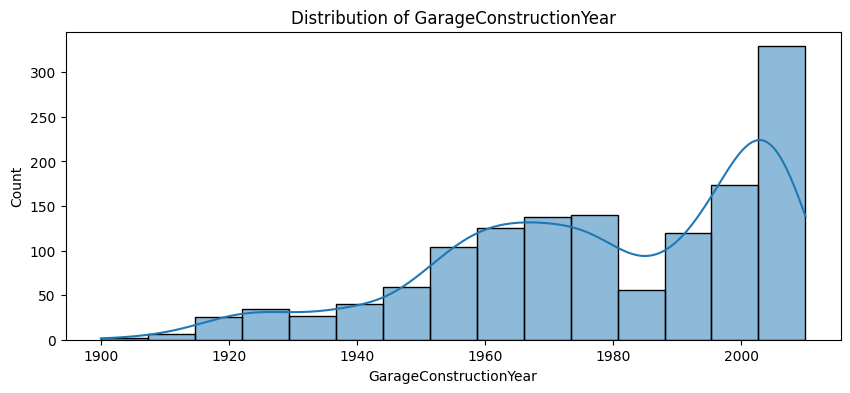

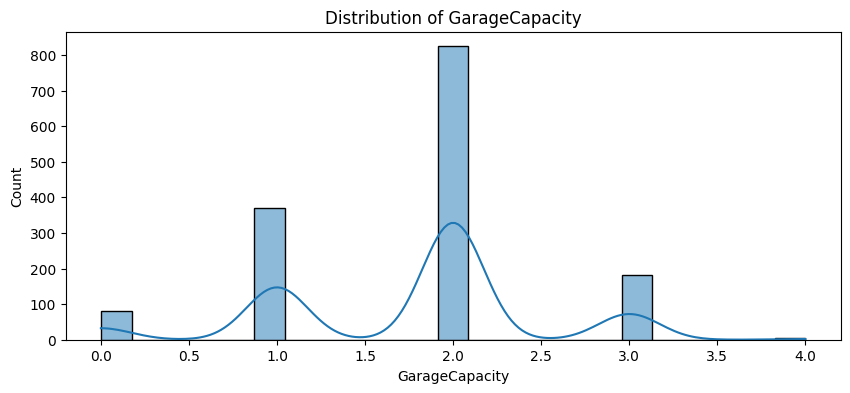

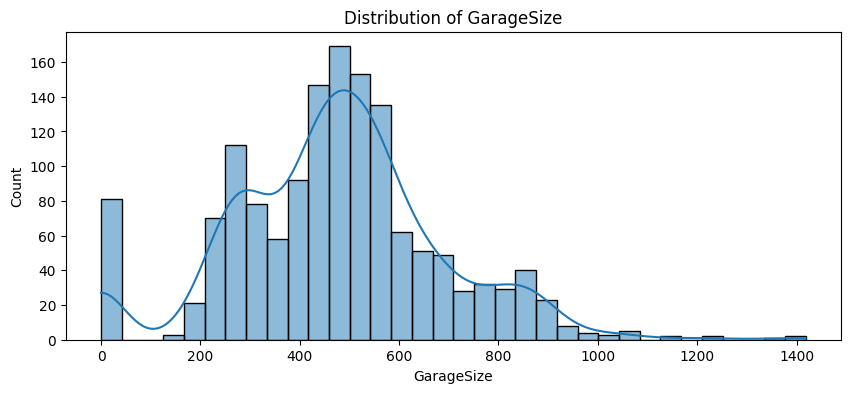

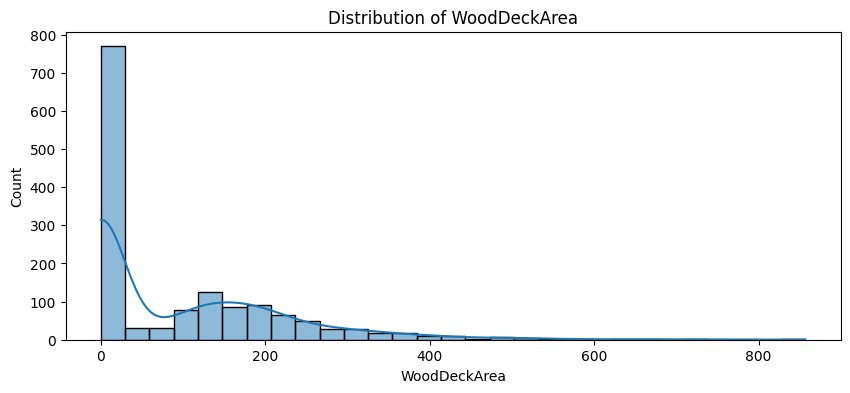

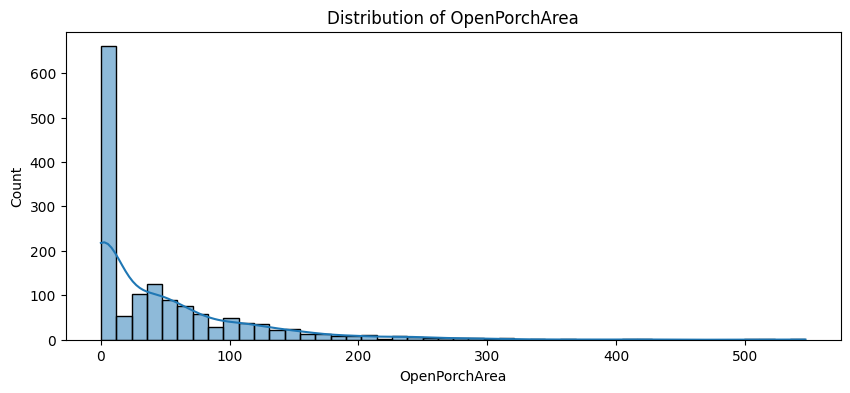

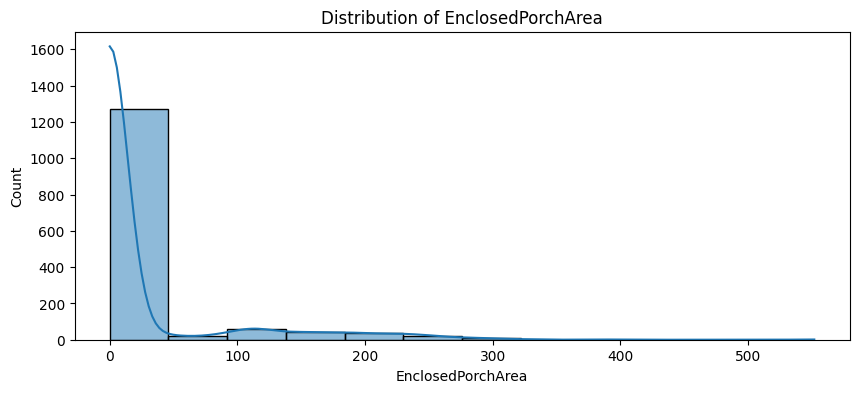

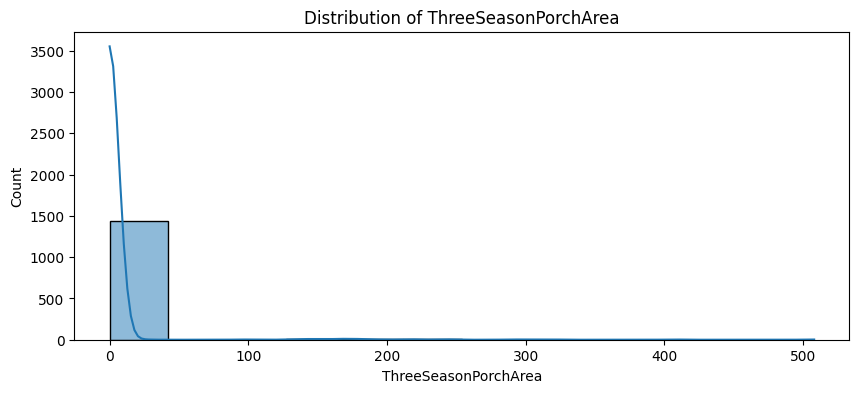

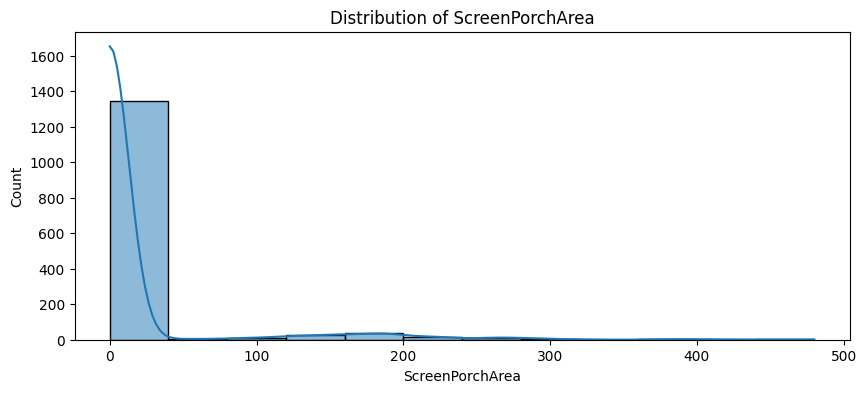

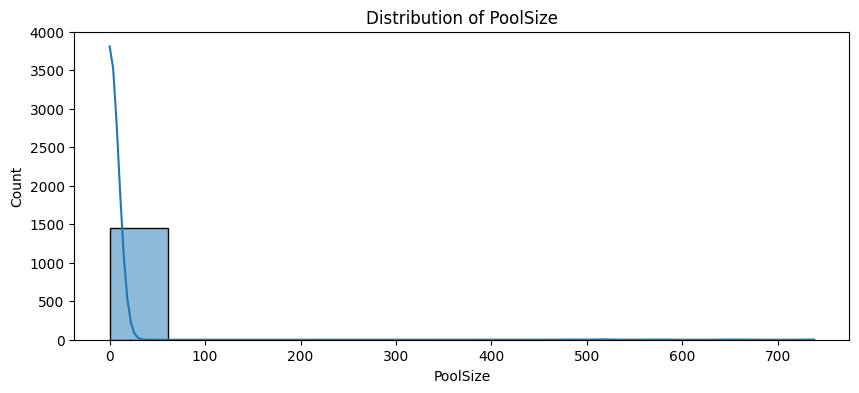

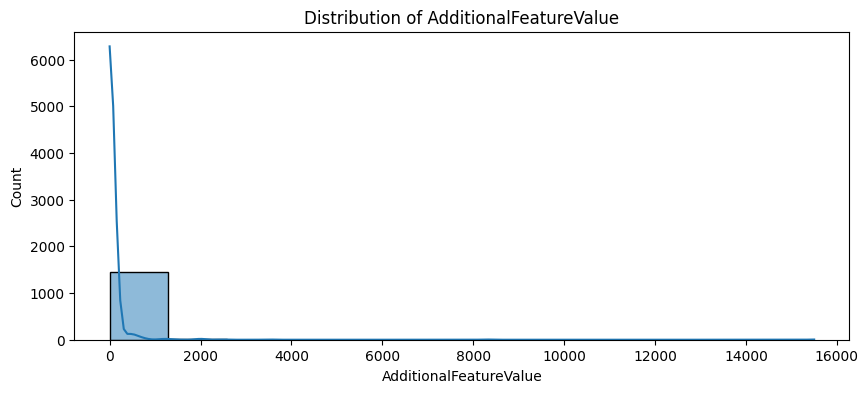

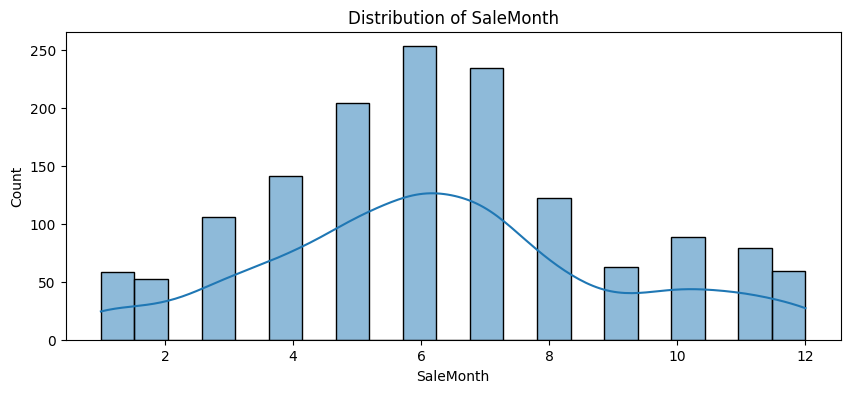

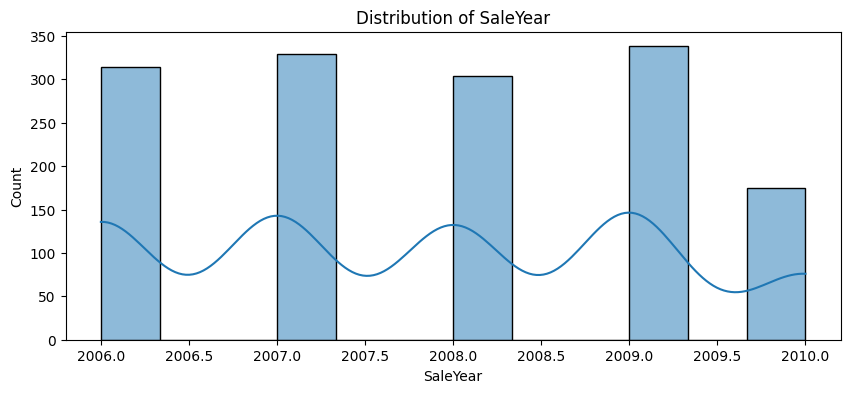

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of numerical features
for column in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


In [10]:
# numerical_data = data.drop(columns=categorical_features)
# processed_data = pd.concat([numerical_data.reset_index(drop=True), encoded_data.reset_index(drop=True)], axis=1)


C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3774619104.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


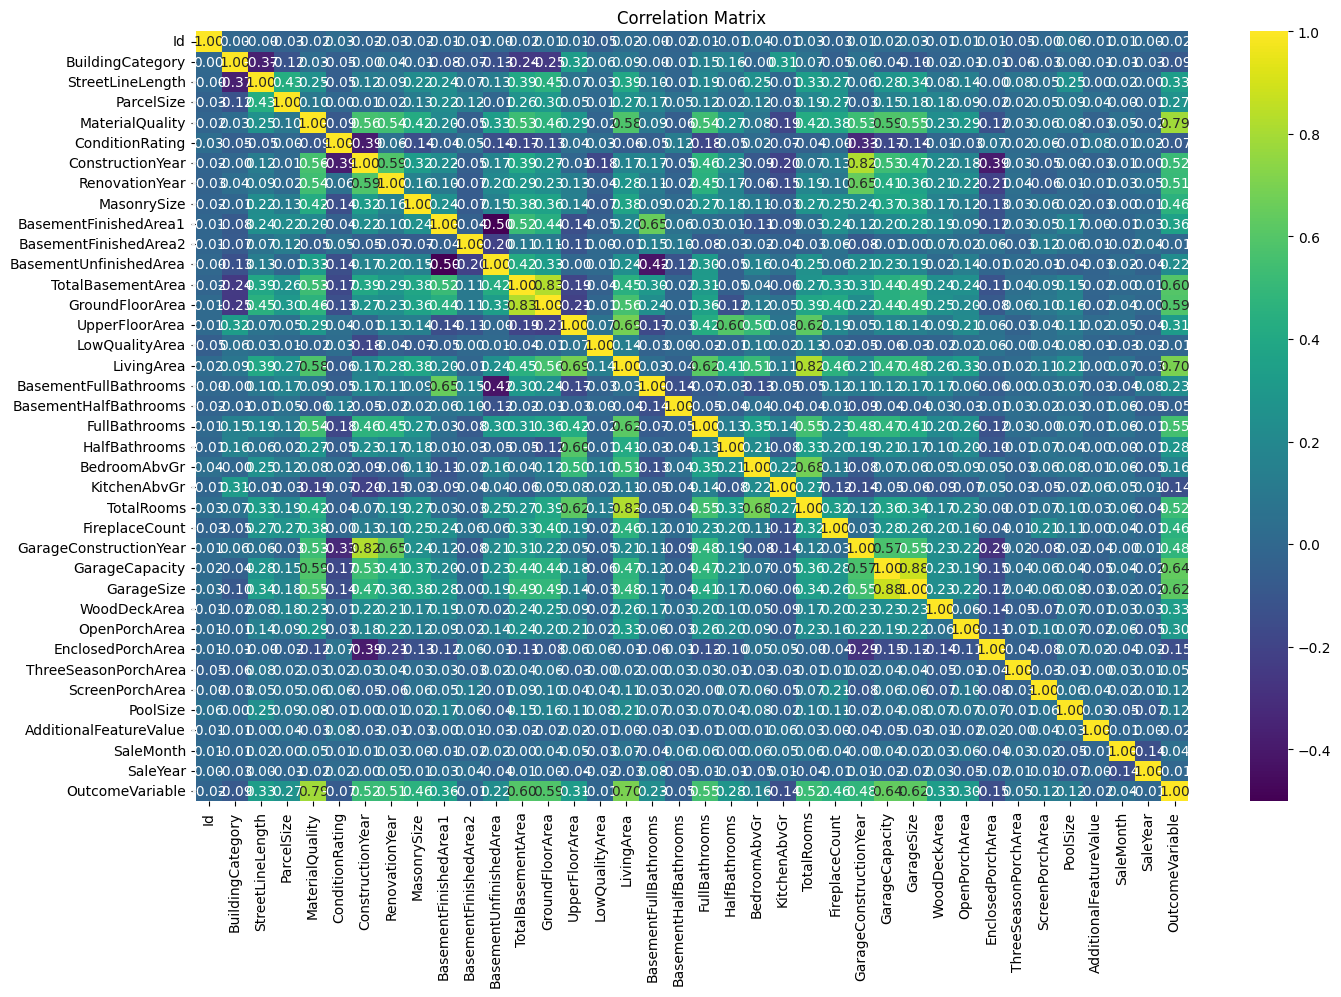

OutcomeVariable           1.000000
MaterialQuality           0.785555
LivingArea                0.695652
GarageCapacity            0.640991
GarageSize                0.624139
TotalBasementArea         0.597766
GroundFloorArea           0.587883
FullBathrooms             0.552546
TotalRooms                0.520388
ConstructionYear          0.516501
RenovationYear            0.508593
GarageConstructionYear    0.480351
MasonrySize               0.459123
FireplaceCount            0.457549
BasementFinishedArea1     0.359460
StreetLineLength          0.330066
WoodDeckArea              0.329843
UpperFloorArea            0.314030
OpenPorchArea             0.299969
HalfBathrooms             0.280481
ParcelSize                0.266204
BasementFullBathrooms     0.226346
BasementUnfinishedArea    0.222487
BedroomAbvGr              0.156211
ScreenPorchArea           0.119172
PoolSize                  0.115630
ThreeSeasonPorchArea      0.051532
SaleMonth                 0.041890
BasementFinishedArea

In [11]:
# Compute the correlation matrix
correlation_matrix = train_data.corr()

# Displaying correlation matrix
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# Correlation with the target variable
target_correlation = correlation_matrix['OutcomeVariable'].sort_values(ascending=False)
print(target_correlation)

Some variables that can be considered the most important in this study:

BasementFinishedArea and BasementFinishedArea2: These two variables have a strong positive correlation, indicating that they measure similar aspects of the finished basement area. Therefore, it may be beneficial to select either one of them or create a composite variable that combines both to avoid the problem of high correlation.

GarageCapacity and GarageSize: These two variables have a strong positive correlation, indicating that they are closely related. Thus, it may be appropriate to choose only one as an influential variable on property value.

OverallQuality: This variable has a moderate negative correlation with SalePrice, indicating that the overall quality of the building affects the sale price. Therefore, this variable may be important in property valuation models.

In summary, these variables appear to be the most important as they represent key aspects that affect property value, and analyzing their relationships helps to better understand the influencing factors.

In [12]:
correlation_numerical = X_train[numerical_features].corrwith(y_train).sort_values(ascending=True)

# Create dummy variables for categorical columns in X_train
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)

correlation_categorical = X_train_encoded.corrwith(y_train).sort_values(ascending=True)

# Concatenate correlation results
correlation_final = pd.concat([correlation_numerical, correlation_categorical])

# Print final correlation matrix
print(correlation_final[60:120])

EnclosedPorchArea           -0.149532
District_IDOTRR             -0.146175
KitchenAbvGr                -0.142785
ExteriorCondition_Fa        -0.136824
ElectricalSystem_FuseF      -0.135802
HeatingQuality_Fa           -0.134232
BasementFinish1_Rec         -0.134136
FenceQuality_MnPrv          -0.133129
District_Sawyer             -0.131930
BasementFinish1_BLQ         -0.131335
GarageQuality_Fa            -0.130119
BasementHeight_Fa           -0.129013
FoundationType_Slab         -0.127514
GarageCondition_Fa          -0.127479
RoadProximity1_Feedr        -0.125273
DwellingType_Duplex         -0.112514
ExteriorCladding1_HdBoard   -0.112265
District_BrDale             -0.110619
ExteriorQuality_Fa          -0.110306
DwellingType_2fmCon         -0.109211
FenceQuality_GdWo           -0.106730
DwellingType_Twnhs          -0.097211
HeatingType_Grav            -0.096416
BasementFinish1_LwQ         -0.095864
District_MeadowV            -0.095721
DwellingStyle_1.5Unf        -0.095688
BuildingCate

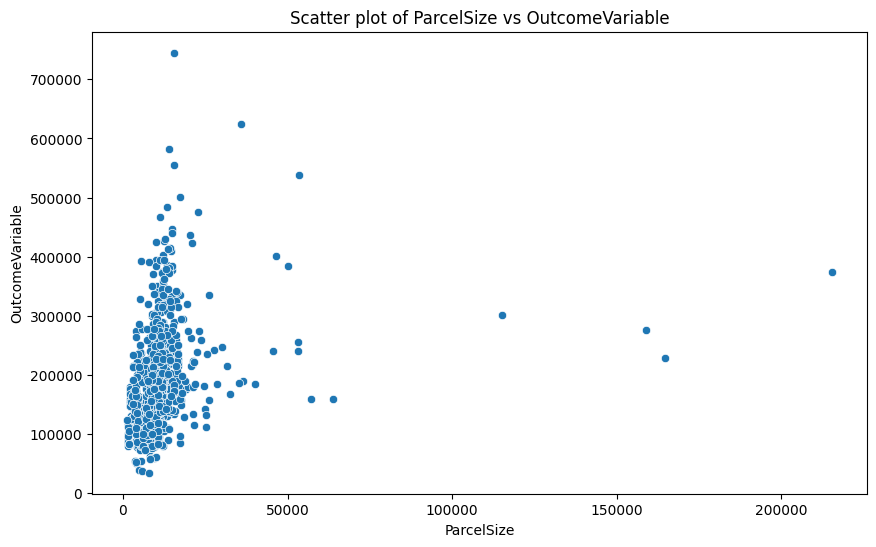

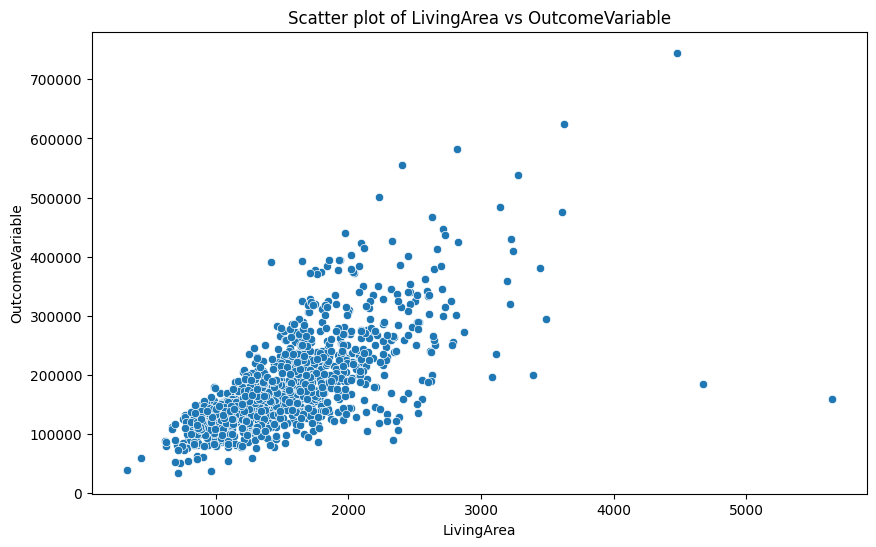

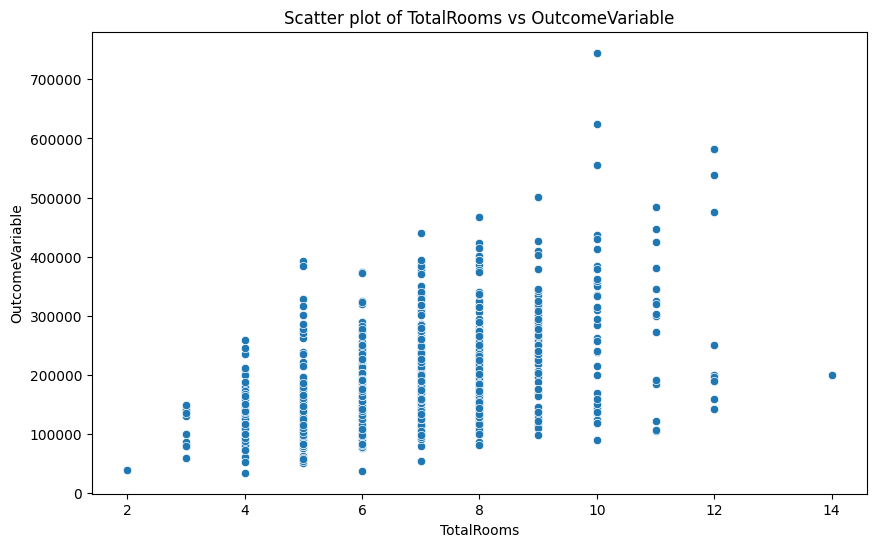

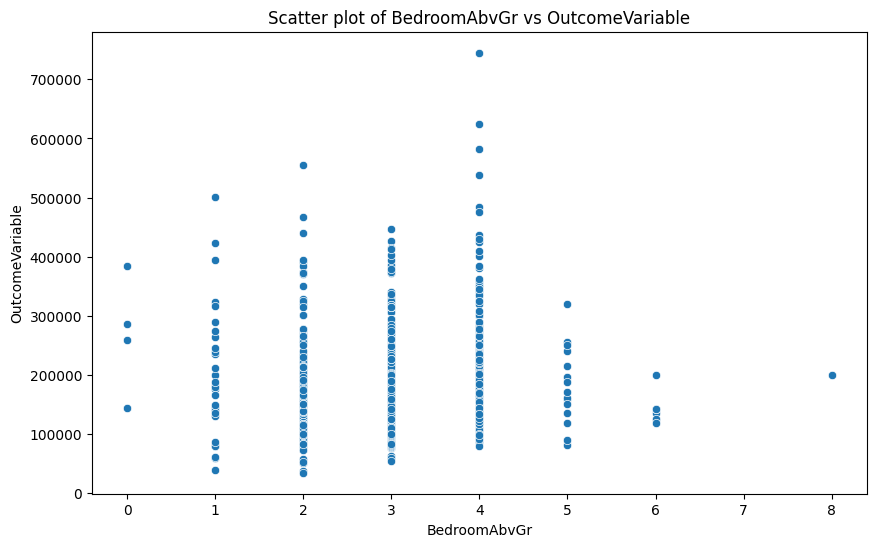

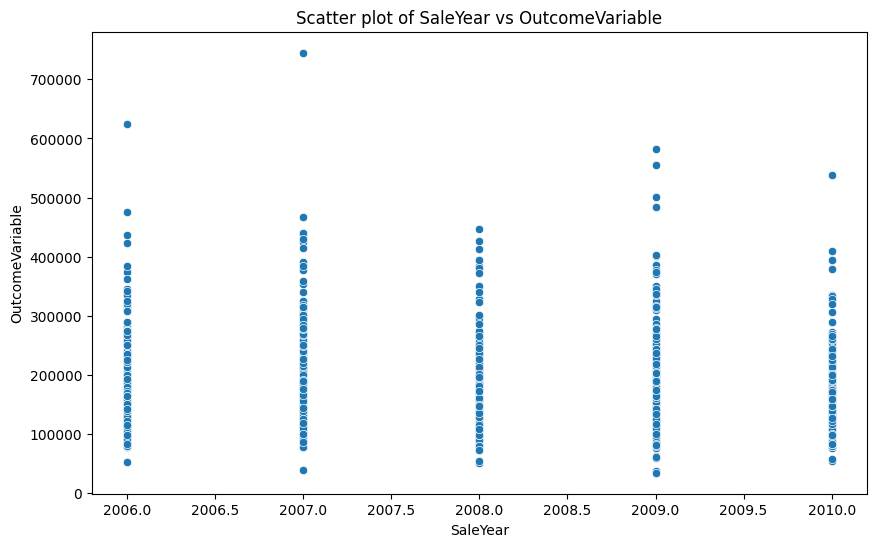

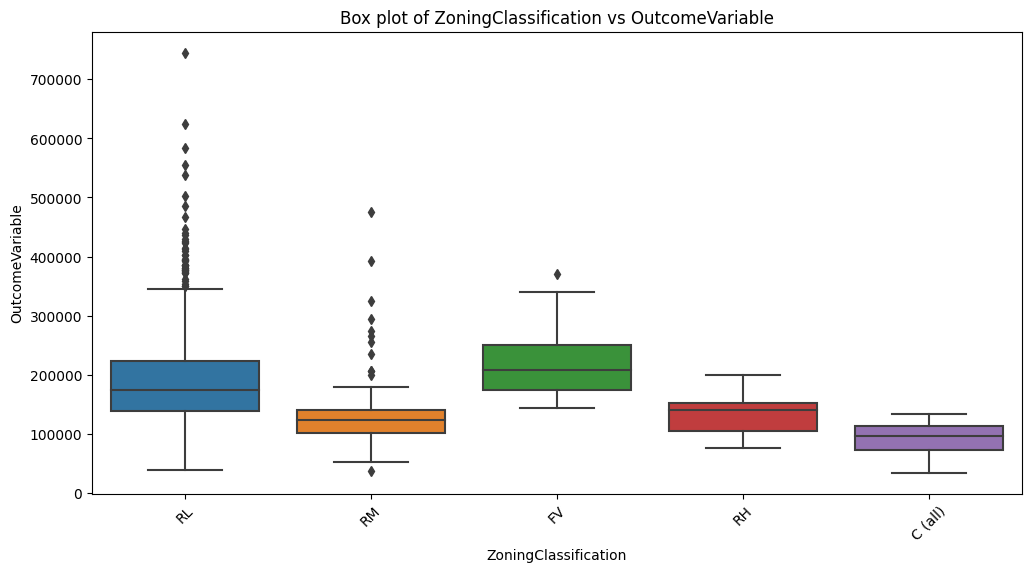

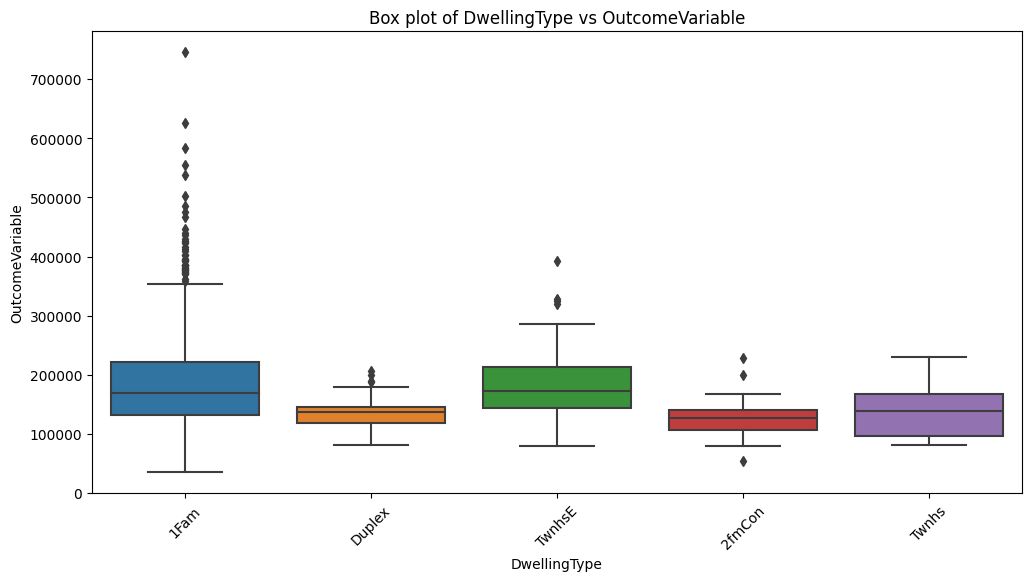

In [13]:
# Scatter plot for selected features
selected_features = ['ParcelSize', 'LivingArea', 'TotalRooms', 'BedroomAbvGr', 'SaleYear']

for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=train_data[feature], y=train_data['OutcomeVariable'])
    plt.title(f'Scatter plot of {feature} vs OutcomeVariable')
    plt.xlabel(feature)
    plt.ylabel('OutcomeVariable')
    plt.show()

# Box plot for selected categorical features (only on the training data)
categorical_features_selected = ['ZoningClassification', 'DwellingType']

for feature in categorical_features_selected:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=train_data[feature], y=train_data['OutcomeVariable'])
    plt.title(f'Box plot of {feature} vs OutcomeVariable')
    plt.xlabel(feature)
    plt.ylabel('OutcomeVariable')
    plt.xticks(rotation=45)
    plt.show()

The relationship between ParcelSize and the OutcomeVariable is not clearly linear. The scatter plot shows significant dispersion in the points, indicating that the relationship might be more complex than a simple linear correlation. There are some clusters or groups of points that exhibit specific patterns or sub-functions within the relationship. This suggests that other factors may be influencing the relationship between the two variables, creating these clusters. The presence of some outliers or extreme values in the data may significantly impact traditional linear correlation analysis. Overall, the relationship between ParcelSize and the OutcomeVariable is not clearly linear, suggesting that more complex models might be required to better understand this relationship.

The relationship between TotalRooms and the OutcomeVariable appears to be generally linear and positive. There is a clear trend of points moving from left to right and upwards, indicating that an increase in the number of rooms is positively correlated with an increase in the OutcomeVariable. Despite the overall linear trend, there is some scatter and variation in the points, with not all points necessarily aligning perfectly along a single straight line. This suggests the presence of some complexities or other factors that might influence the relationship between TotalRooms and the OutcomeVariable. There are no clear outliers or extreme values in the data, making a direct linear correlation a suitable starting point for analysis. Overall, the relationship between TotalRooms and the OutcomeVariable seems to be linear and positive, though there are additional complexities that might require more in-depth analysis. This scatter plot provides a good initial insight into this relationship.

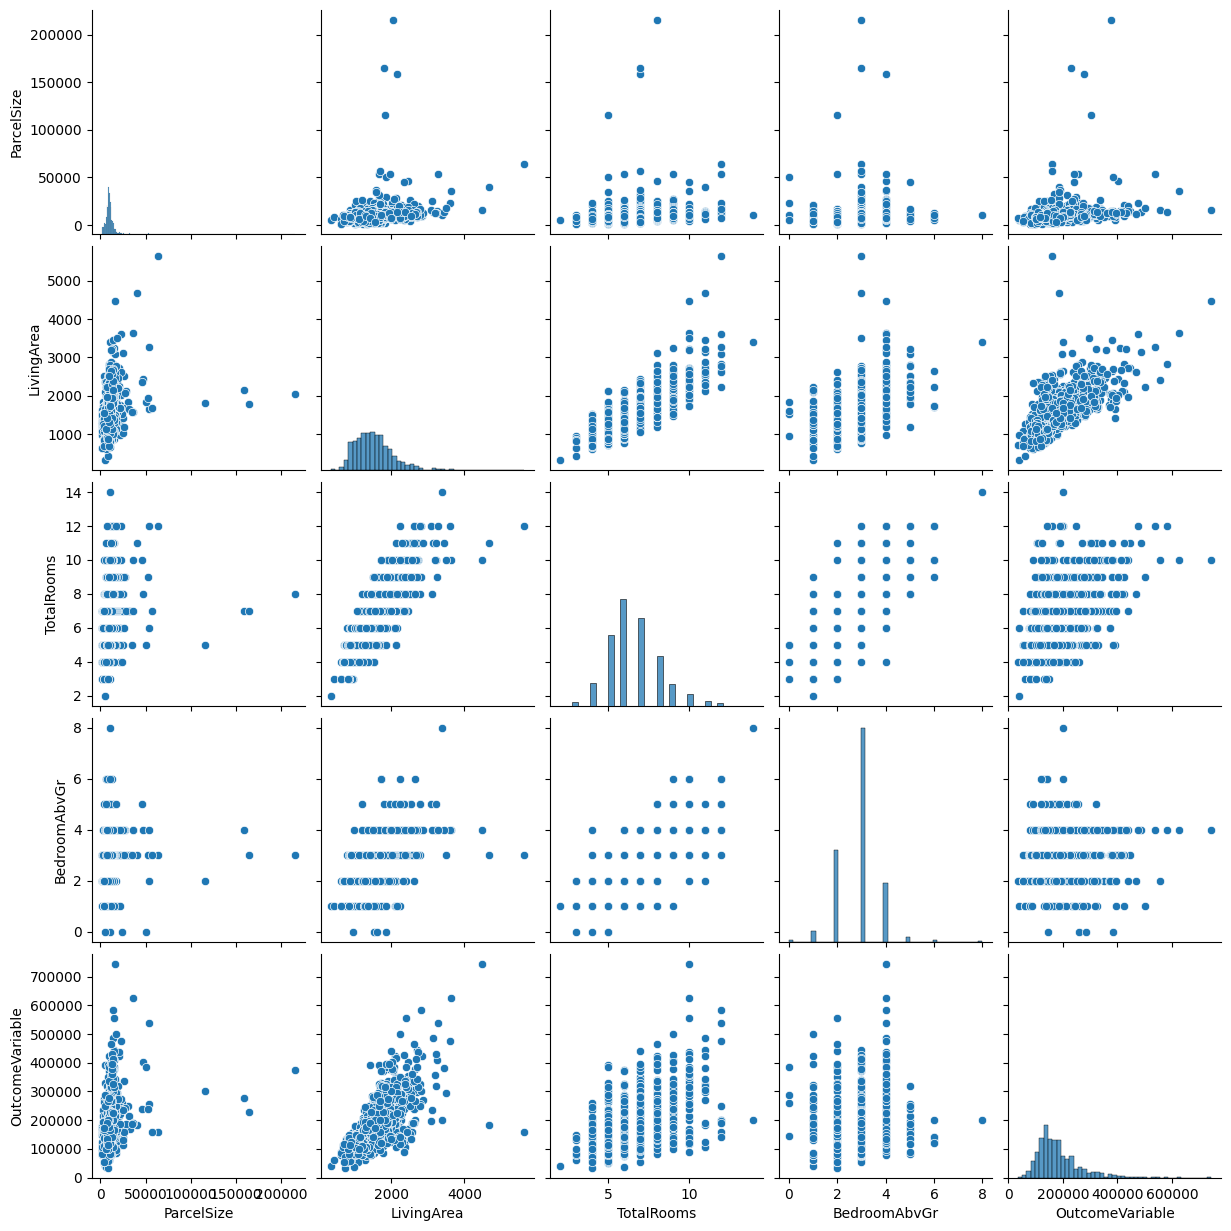

In [14]:
# Pair plot for selected features
selected_features_pairplot = ['ParcelSize', 'LivingArea', 'TotalRooms', 'BedroomAbvGr', 'OutcomeVariable']
sns.pairplot(train_data[selected_features_pairplot])
plt.show()


The relationship between TotalRooms and the OutcomeVariable appears to be more linear and positive, though it is not entirely linear, and there is some variation in the points. The relationship between LivingArea and the OutcomeVariable is also complex, with clusters of points showing specific sub-patterns. The overall distribution of the data suggests the presence of multiple, intertwined factors affecting the OutcomeVariable, and simple linear relationships may not be sufficient to accurately describe these relationships. There are some outliers or extreme values in the data, which could impact traditional statistical analyses and may require additional handling.

Some columns were selected that are likely to contain noise in their values. For example, some features within numerical_cols_with_errors should not logically contain negative values, so this issue was addressed. Additionally, the year columns should not contain dates beyond the current year, so any values after the current year were corrected. It is also illogical for a building to be renovated before it was constructed, so the construction year should logically precede the renovation year. Furthermore, the month columns should only contain values ranging from 1 to 12, and any outliers in all numerical columns were handled accordingly.

In [15]:
info_df = pd.DataFrame()
info_df['missing_val'] = X_train.isnull().sum()
info_df['missing_val_ratio'] = (info_df['missing_val'] / X_train.shape[0] * 100).round().astype(int)
# Display the first 30 to 60 rows of info_df 
print(info_df.iloc[0:60])

                        missing_val  missing_val_ratio
Id                                0                  0
BuildingCategory                  0                  0
ZoningClassification              0                  0
StreetLineLength                217                 19
ParcelSize                        0                  0
RoadAccessType                    0                  0
AlleyAccessType                1094                 94
ParcelShape                       0                  0
TerrainFlatness                   0                  0
UtilityAvailability               0                  0
ParcelSettings                    0                  0
TerrainSlope                      0                  0
District                          0                  0
RoadProximity1                    0                  0
RoadProximity2                    0                  0
DwellingType                      0                  0
DwellingStyle                     0                  0
MaterialQu

In [16]:
print(info_df.iloc[60:81])

                        missing_val  missing_val_ratio
GarageInterior                   64                  5
GarageCapacity                    0                  0
GarageSize                        0                  0
GarageQuality                    64                  5
GarageCondition                  64                  5
DrivewayType                      0                  0
WoodDeckArea                      0                  0
OpenPorchArea                     0                  0
EnclosedPorchArea                 0                  0
ThreeSeasonPorchArea              0                  0
ScreenPorchArea                   0                  0
PoolSize                          0                  0
PoolQuality                    1162                 99
FenceQuality                    935                 80
AdditionalFeature              1122                 96
AdditionalFeatureValue            0                  0
SaleMonth                         0                  0
SaleYear  

**نلاحظ وجود عمود يحوي على قيم مفقودة بنسبة ١٠٠% ويستحسن ازالتته 
سوف نقوم بدراسة ارتباطات العواميد المتبقية و مدى تأثيرها على الخرج و تعبئتها بما يناسب العواميد المرتبط بها**

In [17]:
X_train = X_train.drop("PoolQuality", axis=1)
X_test = X_test.drop("PoolQuality", axis=1)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1168 non-null   int64  
 1   BuildingCategory        1168 non-null   int64  
 2   ZoningClassification    1168 non-null   object 
 3   StreetLineLength        951 non-null    float64
 4   ParcelSize              1168 non-null   int64  
 5   RoadAccessType          1168 non-null   object 
 6   AlleyAccessType         74 non-null     object 
 7   ParcelShape             1168 non-null   object 
 8   TerrainFlatness         1168 non-null   object 
 9   UtilityAvailability     1168 non-null   object 
 10  ParcelSettings          1168 non-null   object 
 11  TerrainSlope            1168 non-null   object 
 12  District                1168 non-null   object 
 13  RoadProximity1          1168 non-null   object 
 14  RoadProximity2          1168 non-null 

In [18]:
X_train.shape

(1168, 79)

In [19]:
X_test.shape

(292, 79)

**نلاحظ ان streetlinelength column يحوي على ١٨% من القيم المفقودة و من مخطط هيت ماب نلاحظ انه يؤثر على الخرج فيمكننا ملؤه
من مصفوفة ال correction matrix سوف نقوم بجلب العمود الاكثر ارتباطا به و الاعتماد على المتوسط بما اننا استنتجنا مشبقا التوزع الطبيعي لهذا العمود**

In [20]:
# Identify the column with the strongest relation to 'StreetLineLength'
corr_with_street_line_length = correlation_matrix['StreetLineLength'].drop('StreetLineLength')
strongest_relation_col = corr_with_street_line_length.idxmax()
strongest_relation_value = corr_with_street_line_length.max()

print(f'The column with the strongest relation to StreetLineLength is: {strongest_relation_col}')
print(f'The correlation value is: {strongest_relation_value}')

# Fill the missing values in 'StreetLineLength' using the column with the strongest relation
X_train['StreetLineLength'] = X_train['StreetLineLength'].fillna(
    X_train[strongest_relation_col] * X_train['StreetLineLength'].mean() / X_train[strongest_relation_col].mean()
)
X_test['StreetLineLength'] = X_test['StreetLineLength'].fillna(
    X_test[strongest_relation_col] * X_test['StreetLineLength'].mean() / X_test[strongest_relation_col].mean()
)

# Check the number of missing values in 'StreetLineLength' after filling
print(f'Number of missing values in StreetLineLength after filling: {X_train["StreetLineLength"].isnull().sum()}')

The column with the strongest relation to StreetLineLength is: GroundFloorArea
The correlation value is: 0.45093184998956515
Number of missing values in StreetLineLength after filling: 0


Filling the **additionalFeature** column:
**We notice that the relationship between this column and the target variable is inversely related and affects the target value, making it important to fill in the missing values despite them being 96%. We observed that the column most strongly correlated with this one has a value of 0 corresponding to the missing values, indicating that the missing values in this column suggest that there are no additional features in the house. Therefore, we will fill in these values to indicate that the house does not have any additional features.**

In [21]:
import pandas as pd
import numpy as np

# Check for similar columns that might correspond to 'AdditionalFeature'
potential_columns = [col for col in X_train.columns if 'AdditionalFeature' in col]
print("Potential columns:", potential_columns)

# Correlation with the target variable
correlation_matrix = X_train.corrwith(y_train).sort_values(ascending=False)

# Correlation between 'AdditionalFeatureValue' and OutcomeVariable
if 'AdditionalFeatureValue' in correlation_matrix.index:
    additional_feature_correlation = correlation_matrix['AdditionalFeatureValue']
    print(f"Correlation between AdditionalFeatureValue and OutcomeVariable: {additional_feature_correlation}")
else:
    print("'AdditionalFeatureValue' not found in the correlation matrix.")

# Fill missing values in 'AdditionalFeature' based on 'AdditionalFeatureValue'
# Assuming 0 in 'AdditionalFeatureValue' means no additional feature
X_train['AdditionalFeature'].fillna(value='NoAdditionalFeature', inplace=True)
X_test['AdditionalFeature'].fillna(value='NoAdditionalFeature', inplace=True)

print(X_train['AdditionalFeature'].value_counts())


Potential columns: ['AdditionalFeature', 'AdditionalFeatureValue']
Correlation between AdditionalFeatureValue and OutcomeVariable: -0.020178536456589097
NoAdditionalFeature    1122
Shed                     41
Othr                      2
Gar2                      2
TenC                      1
Name: AdditionalFeature, dtype: int64


C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\444589755.py:9: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corrwith(y_train).sort_values(ascending=False)


In [22]:
X_train['GarageConstructionYear'] = X_train['GarageConstructionYear'].astype(object)  
X_test['GarageConstructionYear'] = X_test['GarageConstructionYear'].astype(object)  

In [23]:
import pandas as pd

def fill_missing_categorical(train_data, test_data, column):
    if train_data[column].isnull().sum() > 0 or test_data[column].isnull().sum() > 0:
        print(f"Processing column: {column}")

        # Compute correlations with all numerical columns
        column_dummies = pd.get_dummies(train_data[column], prefix=column, drop_first=True)
        data_encoded = pd.concat([train_data[numerical_features], column_dummies], axis=1)
        correlation_with_column = data_encoded.corrwith(data_encoded[column_dummies.columns[0]]).drop(column_dummies.columns[0])

        # Find the column with the highest correlation
        strongest_relation_col = correlation_with_column.idxmax()
        strongest_relation_value = correlation_with_column.max()

        print(f'The column with the strongest relation to {column} is: {strongest_relation_col}')
        print(f'The correlation value is: {strongest_relation_value}')

        # Fill the missing values in the categorical column in both datasets
        if pd.api.types.is_numeric_dtype(train_data[strongest_relation_col]):
            fill_value = train_data[strongest_relation_col].apply(lambda x: train_data[column].mode()[0] if pd.isna(x) else x)
            train_data[column] = train_data[column].fillna(fill_value)
            test_data[column] = test_data[column].fillna(fill_value)
        else:
            fill_value = train_data[strongest_relation_col].map(train_data[strongest_relation_col].value_counts().idxmax())
            train_data[column] = train_data[column].fillna(fill_value)
            test_data[column] = test_data[column].fillna(fill_value)

# Apply the function to all categorical columns
for col in categorical_features:
    fill_missing_categorical(train_data, test_data, col)

# Verify that there are no missing values in categorical features in both datasets
print(train_data[categorical_features].isnull().sum())
print(test_data[categorical_features].isnull().sum())

Processing column: AlleyAccessType
The column with the strongest relation to AlleyAccessType is: BuildingCategory
The correlation value is: 0.18834792528761782
Processing column: MasonryType
The column with the strongest relation to MasonryType is: MasonrySize
The correlation value is: 0.5635104797444324
Processing column: BasementHeight
The column with the strongest relation to BasementHeight is: EnclosedPorchArea
The correlation value is: 0.14218875735053085
Processing column: BasementCondition
The column with the strongest relation to BasementCondition is: BasementHalfBathrooms
The correlation value is: 0.11713553153293697
Processing column: BasementAccess
The column with the strongest relation to BasementAccess is: BasementFinishedArea1
The correlation value is: 0.3088198591797336
Processing column: BasementFinish1
The column with the strongest relation to BasementFinish1 is: BasementFinishedArea2
The correlation value is: 0.1057197190763844
Processing column: BasementFinish2
The c

In [24]:
# Z-score
def detect_outliers_zscore(column, threshold=3):
    z_scores = np.abs((column - column.mean()) / column.std())
    outliers = column[z_scores > threshold]
    return outliers

# detecting z-score in EnclosedPorchArea
enclosed_porch_outliers = detect_outliers_zscore(X_train['LivingArea'])
print("Outliers in LivingArea:")
print(enclosed_porch_outliers)

Outliers in LivingArea:
798     3140
1182    4476
1353    3238
523     4676
118     3222
1298    5642
1169    3627
185     3608
635     3395
1268    3447
304     3493
496     3228
608     3194
197     3112
769     3279
Name: LivingArea, dtype: int64


In [25]:
enclosed_porch_outliers = detect_outliers_zscore(X_train['GarageSize'])
print("Outliers in GarageSize:")
print(enclosed_porch_outliers)

Outliers in GarageSize:
1190    1356
664     1134
178     1166
1298    1418
825     1220
Name: GarageSize, dtype: int64


In [26]:
enclosed_porch_outliers = detect_outliers_zscore(X_train['TotalBasementArea'])
print("Outliers in TotalBasementArea:")
print(enclosed_porch_outliers)

Outliers in TotalBasementArea:
1182    2396
224     2392
523     3138
1298    6110
440     3094
496     3200
1373    2633
1044    2524
Name: TotalBasementArea, dtype: int64


In [27]:
# Handling outliers by adjusting them to the nearest non-outlier value (using Z-score)
def handle_outliers_zscore(column, threshold=3):
    z_scores = np.abs((column - column.mean()) / column.std())
    outliers = z_scores > threshold
    column[outliers] = column.mean()
    return column

X_train['LivingArea'] = handle_outliers_zscore(X_train['LivingArea'])
X_test['LivingArea'] = handle_outliers_zscore(X_test['LivingArea'])

print(X_train['LivingArea'].describe())

count    1168.000000
mean     1500.119027
std       458.315440
min       334.000000
25%      1145.750000
50%      1473.000000
75%      1768.750000
max      3082.000000
Name: LivingArea, dtype: float64


C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3968366533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = column.mean()
C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3968366533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = column.mean()


In [28]:
X_train['GarageSize'] = handle_outliers_zscore(X_train['GarageSize'])
X_test['GarageSize'] = handle_outliers_zscore(X_test['GarageSize'])

print(X_train['GarageSize'].describe())

count    1168.000000
mean      472.924118
std       204.632845
min         0.000000
25%       341.000000
50%       480.000000
75%       576.000000
max      1069.000000
Name: GarageSize, dtype: float64


C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3968366533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = column.mean()
C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3968366533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = column.mean()


In [29]:
X_train['TotalBasementArea'] = handle_outliers_zscore(X_train['TotalBasementArea'])
X_test['TotalBasementArea'] = handle_outliers_zscore(X_test['TotalBasementArea'])

print(X_train['TotalBasementArea'].describe())

count    1168.000000
mean     1047.222749
std       392.436217
min         0.000000
25%       796.000000
50%       997.500000
75%      1284.000000
max      2217.000000
Name: TotalBasementArea, dtype: float64


C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3968366533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = column.mean()
C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3968366533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = column.mean()


In [30]:
X_train['GroundFloorArea'] = handle_outliers_zscore(X_train['GroundFloorArea'])
X_test['GroundFloorArea'] = handle_outliers_zscore(X_test['GroundFloorArea'])

print(X_train['GroundFloorArea'].describe())

count    1168.000000
mean     1157.312359
std       352.809696
min       334.000000
25%       888.000000
50%      1095.000000
75%      1389.500000
max      2259.000000
Name: GroundFloorArea, dtype: float64


C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3968366533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = column.mean()
C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\3968366533.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[outliers] = column.mean()


In [31]:
import pandas as pd

# detectgin outliers using IQR
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

enclosed_porch_outliers = detect_outliers_iqr(X_train['EnclosedPorchArea'])
print("Outliers in EnclosedPorchArea:")
print(enclosed_porch_outliers)

Outliers in EnclosedPorchArea:
638     164
799     264
380     242
1445    252
113     192
       ... 
747     386
21      205
459     248
1396     50
121     140
Name: EnclosedPorchArea, Length: 160, dtype: int64


In [32]:
enclosed_porch_outliers = detect_outliers_iqr(X_train['LowQualityArea'])
print("Outliers in LowQualityArea:")
print(enclosed_porch_outliers)

Outliers in LowQualityArea:
873     232
170     528
1031    397
88      513
829      80
945     120
1364     80
267     420
1440    384
1349    205
125     234
185     572
868      53
635     515
263     390
197     392
883     481
406     473
187     144
729     360
831      80
Name: LowQualityArea, dtype: int64


In [33]:
enclosed_porch_outliers = detect_outliers_iqr(X_train['BuildingCategory'])
print("Outliers in BuildingCategory:")
print(enclosed_porch_outliers)

Outliers in BuildingCategory:
285     160
578     160
48      190
1030    190
243     160
       ... 
1104    160
1297    180
831     160
975     160
87      160
Name: BuildingCategory, Length: 84, dtype: int64


In [34]:
enclosed_porch_outliers = detect_outliers_iqr(X_train['AdditionalFeatureValue'])
print("Outliers in AdditionalFeatureValue:")
print(enclosed_porch_outliers)

Outliers in AdditionalFeatureValue:
346     15500
626       600
813       500
439       800
1210      400
705      3500
5         700
767      1300
953       400
106       450
1230     8300
867       400
249       500
84        700
250       450
539      2000
7         350
786      1200
1083      700
499       480
338       400
912       620
214       450
890      2000
611       500
760       450
335       700
17        500
16        700
1328     1150
800       400
1171     1400
1386     2000
95        480
392      1200
794       500
766       500
725       500
98        400
502       400
1076      500
878       400
1457     2500
510      2000
Name: AdditionalFeatureValue, dtype: int64


In [35]:
enclosed_porch_outliers = detect_outliers_iqr(X_train['BasementFinishedArea2'])
print("Outliers in BasementFinishedArea2:")
print(enclosed_porch_outliers)

Outliers in BasementFinishedArea2:
265     228
1445    627
808     128
113     869
548     645
       ... 
510     180
856     435
1215    374
1396    334
330     264
Name: BasementFinishedArea2, Length: 131, dtype: int64


In [36]:
def handle_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column = column.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return column

X_train['EnclosedPorchArea'] = handle_outliers_iqr(X_train['EnclosedPorchArea'])
X_test['EnclosedPorchArea'] = handle_outliers_iqr(X_test['EnclosedPorchArea'])

In [37]:
X_train['BuildingCategory'] = handle_outliers_iqr(X_train['BuildingCategory'])
X_test['BuildingCategory'] = handle_outliers_iqr(X_test['BuildingCategory'])

In [38]:
X_train['LowQualityArea'] = handle_outliers_iqr(X_train['LowQualityArea'])
X_test['LowQualityArea'] = handle_outliers_iqr(X_test['LowQualityArea'])

In [39]:
X_train['AdditionalFeatureValue'] = handle_outliers_iqr(X_train['AdditionalFeatureValue'])
X_test['AdditionalFeatureValue'] = handle_outliers_iqr(X_test['AdditionalFeatureValue'])

In [40]:
X_train['BasementFinishedArea2'] = handle_outliers_iqr(X_train['BasementFinishedArea2'])
X_test['BasementFinishedArea2'] = handle_outliers_iqr(X_test['BasementFinishedArea2'])

In [41]:
import pandas as pd
import numpy as np
from scipy import stats


# Correct Data Entry Errors
# Correcting for all numerical columns
numerical_cols_with_errors = [
    'ParcelSize', 'StreetLineLength',
    'MasonrySize', 'BasementFinishedArea1', 'BasementFinishedArea2', 'BasementUnfinishedArea',
    'TotalBasementArea', 'GroundFloorArea', 'UpperFloorArea', 'LowQualityArea', 'LivingArea',
    'BasementFullBathrooms', 'BasementHalfBathrooms', 'FullBathrooms', 'HalfBathrooms',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotalRooms', 'FireplaceCount', 'GarageCapacity', 'GarageSize',
    'WoodDeckArea', 'OpenPorchArea', 'EnclosedPorchArea', 'ThreeSeasonPorchArea', 'ScreenPorchArea',
    'PoolSize', 'AdditionalFeatureValue', 'SaleMonth'
]

for col in numerical_cols_with_errors:
    X_train[col] = X_train[col].apply(lambda x: abs(x) if x < 0 else x)
    X_test[col] = X_test[col].apply(lambda x: abs(x) if x < 0 else x)

# Correct years
current_year = pd.Timestamp.now().year

def preprocess_year_data(data):
    data['ConstructionYear'] = data['ConstructionYear'].apply(lambda x: x if x <= current_year else current_year)
    data['RenovationYear'] = data['RenovationYear'].apply(lambda x: x if x <= current_year else current_year)
    data['GarageConstructionYear'] = data['GarageConstructionYear'].apply(lambda x: x if x <= current_year else current_year)

    # Ensure RenovationYear is not less than ConstructionYear
    data['RenovationYear'] = data.apply(
        lambda row: row['ConstructionYear'] if row['RenovationYear'] < row['ConstructionYear'] else row['RenovationYear'], axis=1
    )

    # Sale month should be between 1 and 12
    data['SaleMonth'] = data['SaleMonth'].apply(lambda x: x if 1 <= x <= 12 else np.nan)

    return data

# Apply preprocessing to both train_data and test_data
X_train = preprocess_year_data(X_train)
X_test = preprocess_year_data(X_test)


# Remove Duplicates
duplicates = X_train.duplicated().sum()
print(f'Duplicates: {duplicates}')
X_train = X_train.drop_duplicates()
X_test = X_test.drop_duplicates()

# Feature Transformation
skewed_features = ['ParcelSize', 'LivingArea']
for feature in skewed_features:
    X_train[feature] = np.log1p(X_train[feature])
    X_test[feature] = np.log1p(X_test[feature])

# Check cleaned data
X_train.info()
X_train.head()


Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 79 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1168 non-null   int64  
 1   BuildingCategory        1168 non-null   float64
 2   ZoningClassification    1168 non-null   object 
 3   StreetLineLength        1168 non-null   float64
 4   ParcelSize              1168 non-null   float64
 5   RoadAccessType          1168 non-null   object 
 6   AlleyAccessType         74 non-null     object 
 7   ParcelShape             1168 non-null   object 
 8   TerrainFlatness         1168 non-null   object 
 9   UtilityAvailability     1168 non-null   object 
 10  ParcelSettings          1168 non-null   object 
 11  TerrainSlope            1168 non-null   object 
 12  District                1168 non-null   object 
 13  RoadProximity1          1168 non-null   object 
 14  RoadProximity2          

,Id,BuildingCategory,ZoningClassification,StreetLineLength,ParcelSize,RoadAccessType,AlleyAccessType,ParcelShape,TerrainFlatness,UtilityAvailability,...,ThreeSeasonPorchArea,ScreenPorchArea,PoolSize,FenceQuality,AdditionalFeature,AdditionalFeatureValue,SaleMonth,SaleYear,SaleType,SaleCondition
254,255,20.0,RL,70.0,9.036106,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,NaN,NoAdditionalFeature,0.0,6,2010,WD,Normal
1066,1067,60.0,RL,59.0,8.966739,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,NaN,NoAdditionalFeature,0.0,5,2009,WD,Normal
638,639,30.0,RL,67.0,9.080004,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,MnPrv,NoAdditionalFeature,0.0,5,2008,WD,Normal
799,800,50.0,RL,60.0,8.881975,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,MnPrv,NoAdditionalFeature,0.0,6,2007,WD,Normal
380,381,50.0,RL,50.0,8.517393,Pave,Pave,Reg,Lvl,AllPub,...,0,0,0,NaN,NoAdditionalFeature,0.0,5,2010,WD,Normal


In [42]:
correlations_with_target = X_train.corrwith(y_train).abs().sort_values(ascending=False)

print(correlations_with_target[:-10])

MaterialQuality           0.785555
GarageCapacity            0.640991
LivingArea                0.636179
GarageSize                0.616792
TotalBasementArea         0.592039
GroundFloorArea           0.568828
FullBathrooms             0.552546
TotalRooms                0.520388
ConstructionYear          0.516501
RenovationYear            0.508593
MasonrySize               0.459123
FireplaceCount            0.457549
ParcelSize                0.398274
BasementFinishedArea1     0.359460
StreetLineLength          0.357136
WoodDeckArea              0.329843
GarageConstructionYear    0.327690
UpperFloorArea            0.314030
OpenPorchArea             0.299969
HalfBathrooms             0.280481
BasementFullBathrooms     0.226346
BasementUnfinishedArea    0.222487
BedroomAbvGr              0.156211
KitchenAbvGr              0.142785
ScreenPorchArea           0.119172
PoolSize                  0.115630
ConditionRating           0.074391
dtype: float64


C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\4184228540.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_with_target = X_train.corrwith(y_train).abs().sort_values(ascending=False)


Variance is a statistical measure that represents the dispersion or spread of a set of data points. In simpler terms, it tells us how much the values in a dataset differ from the mean (average) value. High variance indicates that the data points are spread out over a wide range of values, while low variance suggests that the data points are closer to the mean.

Outcomes of dimensionality reduction: By removing low-variance features, you can reduce the dimensionality of your dataset, which may lead to improved performance and efficiency of machine learning models.
Model performance improvement: Low-variance features may not carry significant information and can be considered noise. Removing them can improve model performance.
Simplifying models: Simplifying the dataset by removing irrelevant features makes models easier to interpret and understand.

In [43]:
from sklearn.feature_selection import VarianceThreshold
variance_threshold = VarianceThreshold(threshold=0.01)
data_high_variance = variance_threshold.fit_transform(X_train[numerical_features])

data_high_variance

array([[ 255.,   20.,   70., ...,    0.,    6., 2010.],
       [1067.,   60.,   59., ...,    0.,    5., 2009.],
       [ 639.,   30.,   67., ...,    0.,    5., 2008.],
       ...,
       [1295.,   20.,   60., ...,    0.,    4., 2006.],
       [ 861.,   50.,   55., ...,    0.,    6., 2007.],
       [1127.,  120.,   53., ...,    0.,    6., 2009.]])

Creates a new feature named GroundFloor_LivingArea by multiplying GroundFloorArea (ground floor area) with LivingArea (total living area). 
This interaction term can capture the combined effect of the ground floor area and total living area, which might be useful in predicting the value or quality of the property.

TotalArea_Rooms is created by multiplying LivingArea (total living area) with TotalRooms (total number of rooms). 
This interaction term can help understand how the combination of living area and the number of rooms affects the target variable, such as the house price.

Creates a new feature called Bedrooms_Bathrooms by multiplying BedroomAbvGr (number of bedrooms above ground) with FullBathrooms (number of full bathrooms). 
This interaction term can provide insight into the combined impact of the number of bedrooms and bathrooms on the target variable.

In [44]:
# Create Interaction Terms
X_train['GroundFloor_LivingArea'] = X_train['GroundFloorArea'] * X_train['LivingArea']
X_train['TotalArea_Rooms'] = X_train['LivingArea'] * X_train['TotalRooms']
X_train['Bedrooms_Bathrooms'] = X_train['BedroomAbvGr'] * X_train['FullBathrooms']

In [45]:
# Create Interaction Terms
X_test['GroundFloor_LivingArea'] = X_test['GroundFloorArea'] * X_test['LivingArea']
X_test['TotalArea_Rooms'] = X_test['LivingArea'] * X_test['TotalRooms']
X_test['Bedrooms_Bathrooms'] = X_test['BedroomAbvGr'] * X_test['FullBathrooms']

In [46]:
# !jupyter nbconvert --to html machine.ipynb

Simplifying Continuous Variables:
Binning simplifies continuous variables by converting them into categorical variables. This can make the data easier to analyze and interpret.

Handling Non-Linear Relationships:
Binning can be useful in dealing with non-linear relationships between a continuous variable and the target variable. By grouping values into bins, you can capture non-linear effects that might not be easily modeled using continuous variables.

Enhancing Model Interpretability:
Categorical variables with meaningful labels (e.g., "Small," "Medium," "Large") are often easier to interpret and explain compared to continuous variables.

Reducing the Impact of Outliers:
Binning can reduce the impact of outliers in a continuous variable. Outliers are grouped into the same bin, which can help stabilize the effect of outliers.**


In [47]:
# Binning a continuous variable (example with ParcelSize)
X_train['ParcelSizeBin'] = pd.cut(X_train['ParcelSize'], bins=[0, 5000, 10000, 20000, 50000], labels=['small', 'medium', 'large', 'very_large'])
X_test['ParcelSizeBin'] = pd.cut(X_test['ParcelSize'], bins=[0, 5000, 10000, 20000, 50000], labels=['small', 'medium', 'large', 'very_large'])

In [48]:
correlation_matrix = X_train.corr()

# Identify the column with the strongest relation to 'MasonrySize'
# Compute correlation of 'MasonrySize' with all other columns
corr_with_masonry_size = correlation_matrix['MasonrySize'].drop('MasonrySize')

strongest_relation_col = corr_with_street_line_length.idxmax()
strongest_relation_value = corr_with_street_line_length.max()

print(f'The column with the strongest relation to MasonrySize is: {strongest_relation_col}')
print(f'The correlation value is: {strongest_relation_value}')

# Fill the missing values in 'StreetLineLength' using the column with the strongest relation

X_train['MasonrySize'] = X_train['MasonrySize'].fillna(
    X_train[strongest_relation_col] * X_train['MasonrySize'].mean() / X_train[strongest_relation_col].mean()
)
X_test['MasonrySize'] = X_test['MasonrySize'].fillna(
    X_test[strongest_relation_col] * X_test['MasonrySize'].mean() / X_test[strongest_relation_col].mean()
)

# Check the number of missing values in 'StreetLineLength' after filling
print(f'Number of missing values in MasonrySize after filling: {X_train["MasonrySize"].isnull().sum()}')


The column with the strongest relation to MasonrySize is: GroundFloorArea
The correlation value is: 0.45093184998956515
Number of missing values in MasonrySize after filling: 0


C:\Users\mudar\AppData\Local\Temp\ipykernel_28952\1894126708.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = X_train.corr()


The groupby function groups the data by the "District" column. The agg function specifies the aggregation operations to be applied to each grouped subset:

'ParcelSize': 'mean': Calculates the mean ParcelSize for each district.
'LivingArea': 'mean': Calculates the mean LivingArea for each district. We chose to calculate the mean because the data distribution in both columns is normal.
'OutcomeVariable': 'median': Calculates the median of the OutcomeVariable for each district.
The set_index method is used to convert the aggregated data back into a regular DataFrame, which includes the "District" column as a regular column. This step creates a new DataFrame, District_aggregates, containing the aggregated values for each district. The merge function then merges the original data DataFrame with the District_aggregates DataFrame on the "District" column. The parameter suffixes=('', '_district_avg') specifies the suffixes to append to the overlapping column names. Here, the aggregated columns in District_aggregates will get the suffix "_district_avg". The result is that for each row in the original data, the corresponding district-level average values are added as new columns:

ParcelSize_district_avg
LivingArea_district_avg
OutcomeVariable_district_avg

In [49]:
import pandas as pd

# Assuming train_data includes both the features and the target variable OutcomeVariable
# Example: Aggregating data by district using train_data
district_aggregates = train_data.groupby('District').agg({
    'ParcelSize': 'mean',
    'LivingArea': 'mean',
    'OutcomeVariable': 'median'
}).reset_index()

# Rename the aggregated columns to avoid confusion when merging
district_aggregates.rename(columns={
    'ParcelSize': 'ParcelSize_district_avg',
    'LivingArea': 'LivingArea_district_avg',
    'OutcomeVariable': 'OutcomeVariable_district_median'
}, inplace=True)

# Merge aggregates back into X_train using the 'District' column
X_train = X_train.merge(district_aggregates, on='District', how='left')

# Now X_train has the aggregated features
print(X_train.head())


     Id  BuildingCategory ZoningClassification  StreetLineLength  ParcelSize  \
0   255              20.0                   RL              70.0    9.036106   
1  1067              60.0                   RL              59.0    8.966739   
2   639              30.0                   RL              67.0    9.080004   
3   800              50.0                   RL              60.0    8.881975   
4   381              50.0                   RL              50.0    8.517393   

  RoadAccessType AlleyAccessType ParcelShape TerrainFlatness  \
0           Pave             NaN         Reg             Lvl   
1           Pave             NaN         IR1             Lvl   
2           Pave             NaN         Reg             Lvl   
3           Pave             NaN         Reg             Lvl   
4           Pave            Pave         Reg             Lvl   

  UtilityAvailability  ... SaleYear SaleType SaleCondition  \
0              AllPub  ...     2010       WD        Normal   
1         

In [50]:
import pandas as pd

# Assuming train_data includes both the features and the target variable OutcomeVariable
# Example: Aggregating data by district using train_data
district_aggregates = test_data.groupby('District').agg({
    'ParcelSize': 'mean',
    'LivingArea': 'mean',
    'OutcomeVariable': 'median'
}).reset_index()

# Rename the aggregated columns to avoid confusion when merging
district_aggregates.rename(columns={
    'ParcelSize': 'ParcelSize_district_avg',
    'LivingArea': 'LivingArea_district_avg',
    'OutcomeVariable': 'OutcomeVariable_district_median'
}, inplace=True)

# Merge aggregates back into X_train using the 'District' column
X_test = X_test.merge(district_aggregates, on='District', how='left')

Splitting the Data into Training and Testing Sets:

Here, we divide the data into two sets: a training set and a testing set. 80% of the data is used for training, and 20% is used for testing.

Applying OneHotEncoder to Categorical Features:

We use OneHotEncoder to convert categorical features (i.e., features that are text-based, like city names) into numerical format.

Training and Transforming the Training Data:

We train the encoder on the training data and transform the categorical features into numbers. These numbers are then converted into a DataFrame.

Transforming the Testing Data:

We use the encoder to transform the categorical features in the testing data in the same way we did with the training data.

Combining Numerical Features with Encoded Features:

We combine the numerical features (like numbers) with the features that were converted from categorical to numerical. This results in a comprehensive set of features that can be used for training.

Standardizing Numerical Features Using StandardScaler:

We use StandardScaler to standardize the numerical features. Standardization means scaling the numbers to a specific range so that all features are on the same scale.

Selecting Only Numerical Features Without the Target Variable:

We identify the numerical features to be standardized, excluding the target variable (OutcomeVariable).

Standardizing the Training Features:

We apply standardization to the training features.

Standardizing the Testing Features:

We use the same scaler to apply standardization to the testing features.

Displaying the Final Shapes of the Training and Testing Sets:

Finally, we display the size of the training and testing data to see how they look after all these steps.

In [51]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Filter categorical features that exist in both X_train and X_test
categorical_features = [feature for feature in categorical_features if feature in X_train.columns and feature in X_test.columns]

# OneHotEncoder to the categorical features
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Train and transform the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Transform the test data
X_test_encoded = encoder.transform(X_test[categorical_features])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate numerical features with encoded categorical features
X_train_final = pd.concat([X_train.drop(categorical_features, axis=1).reset_index(drop=True), X_train_encoded_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test.drop(categorical_features, axis=1).reset_index(drop=True), X_test_encoded_df.reset_index(drop=True)], axis=1)

# Standardize numerical features using StandardScaler
scaler = StandardScaler()

# Define numerical features only (excluding the target variable if it's present)
numerical_features_final = [feature for feature in numerical_features if feature != 'OutcomeVariable']

# Standardize the training features
X_train_final[numerical_features_final] = scaler.fit_transform(X_train_final[numerical_features_final])

# Standardize the test features
X_test_final[numerical_features_final] = scaler.transform(X_test_final[numerical_features_final])

# Display the final shapes of the training and test sets
print(f'Training set: X_train_final: {X_train_final.shape}, y_train: {y_train.shape}')
print(f'Test set: X_test_final: {X_test_final.shape}, y_test: {y_test.shape}')

Training set: X_train_final: (1168, 305), y_train: (1168,)
Test set: X_test_final: (292, 305), y_test: (292,)


In [52]:
comparison_table = {}

comparison_table['exp_number'] = []
comparison_table['exp_reason'] = []
comparison_table['model_name'] = []
comparison_table['features'] = []
comparison_table['R-score'] = []

def add_to_table(exp_number, exp_reason, model_name, features, r_score):
    comparison_table['exp_number'].append(exp_number)
    comparison_table['exp_reason'].append(exp_reason)
    comparison_table['model_name'].append(model_name)
    comparison_table['features'].append(features)
    comparison_table['R-score'].append(r_score)
    print("R-score:", r_score)

In [53]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
import pandas as pd

# Inspect the data types
print(X_train_final.dtypes)
print(X_test_final.dtypes)

# Convert non-numeric columns to numeric
X_train_final = pd.get_dummies(X_train_final)
X_test_final = pd.get_dummies(X_test_final)

# Ensure both train and test sets have the same columns after encoding
X_train_final, X_test_final = X_train_final.align(X_test_final, join='left', axis=1, fill_value=0)

Id                       float64
BuildingCategory         float64
StreetLineLength         float64
ParcelSize               float64
MaterialQuality          float64
                          ...   
SaleCondition_AdjLand    float64
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
Length: 305, dtype: object
Id                       float64
BuildingCategory         float64
StreetLineLength         float64
ParcelSize               float64
MaterialQuality          float64
                          ...   
SaleCondition_AdjLand    float64
SaleCondition_Alloca     float64
SaleCondition_Family     float64
SaleCondition_Normal     float64
SaleCondition_Partial    float64
Length: 305, dtype: object


In [54]:

# Initialize and train the model
ridge = Ridge(alpha=1.0, random_state=42)
ridge.fit(X_train_final, y_train)

# Make predictions on the training and test sets
y_train_pred = ridge.predict(X_train_final)
y_test_pred = ridge.predict(X_test_final)

# Calculate R-squared for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')

# Save the results (assuming add_to_table is a defined function)
add_to_table("1", "basemodel", "ridge", "alpha=1.0 , random_state=42", test_r2)

Train R2 Score: 0.9239045210806698
Test R2 Score: 0.8725302670450198
R-score: 0.8725302670450198


In [55]:
ridge_bigger_alpha = Ridge(alpha=10, random_state=42)

ridge_bigger_alpha.fit(X_train_final, y_train)

y_train_pred = ridge_bigger_alpha.predict(X_train_final)
y_test_pred = ridge_bigger_alpha.predict(X_test_final)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')

add_to_table("2", "basemodel", "ridge", "alpha=10 , random_state=42", test_r2)

Train R2 Score: 0.9083744433590871
Test R2 Score: 0.8714923582030943
R-score: 0.8714923582030943


In [56]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd


# Initialize Lasso regression model
lasso = Lasso(alpha=1.0, random_state=42)

# Train the lasso
lasso.fit(X_train_final, y_train)

# Predict on training and test sets
y_train_pred = lasso.predict(X_train_final)
y_test_pred = lasso.predict(X_test_final)

# Calculate R-squared score for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')

# Assuming you want to add the results to some table (add_to_table function)
add_to_table("3", "lasso handles overfit more efficiently👍🏻", "lasso", "alpha=1.0 , random_state=42", test_r2)


Train R2 Score: 0.9355497145607103
Test R2 Score: 0.879681922929678
R-score: 0.879681922929678


c:\Users\mudar\anaconda3\envs\Tenserflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.280e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [57]:
lasso_bigger_alpha = Lasso(alpha=10, random_state=42)

# Train the model
lasso_bigger_alpha.fit(X_train_final, y_train)

# Predict on training and test sets
y_train_pred = lasso_bigger_alpha.predict(X_train_final)
y_test_pred = lasso_bigger_alpha.predict(X_test_final)

# Calculate R-squared score for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')

# Assuming you want to add the results to some table (add_to_table function)
add_to_table("4", "lasso handles overfit more efficiently👍🏻", "lasso", "alpha=10 , random_state=42", test_r2)


Train R2 Score: 0.934261168720274
Test R2 Score: 0.8836250097893008
R-score: 0.8836250097893008


c:\Users\mudar\anaconda3\envs\Tenserflow\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.524e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


In [58]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress convergence warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)


In [59]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'ridge': {
            'model': Ridge(),
            'params': {
                'alpha': [0.1, 0.5, 1, 2],
                'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0.1, 0.5, 1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Assuming X and Y are your feature matrix and target variable, respectively
find_best_model_using_gridsearchcv(X_train_final, y_train)


,model,best_score,best_params
0,ridge,0.819000,"{'alpha': 2, 'solver': 'svd'}"
1,lasso,0.774104,"{'alpha': 2, 'selection': 'cyclic'}"


**نمر على كل نموذج ونقوم بما يلي:
تدريب النموذج على بيانات التدريب.
توقع القيم المستهدفة لبيانات التدريب وحساب خطأ التربيع المتوسط (MSE) ومعامل التحديد (R-squared).
توقع القيم المستهدفة لبيانات الاختبار وحساب خطأ التربيع المتوسط (MSE) ومعامل التحديد (R-squared).
حساب متوسط درجة التحقق المتقاطع (Cross-Validation Score) باستخدام 5 انقسامات.
حفظ النتائج لكل نموذج في قاموس.**

In [61]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pandas as pd

def evaluate_algorithms(X_train, y_train, X_test, y_test, best_params):
    algorithms = {
        'ridge': Ridge(**best_params['ridge']),
        'lasso': Lasso(**best_params['lasso']),
    }

    results = {}

    for algo_name, model in algorithms.items():
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        train_r2 = r2_score(y_train, y_train_pred)
        
        y_test_pred = model.predict(X_test)
        test_r2 = r2_score(y_test, y_test_pred)
        
        cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()
        
        results[algo_name] = {
            'Train R-squared': train_r2,
            'Test R-squared': test_r2,
            'Cross-Validation Score': cv_score
        }

    return pd.DataFrame(results).T

# Assuming best_params is a dictionary containing the best hyperparameters obtained from grid search
best_params = {
    'ridge': {'alpha': 2, 'solver': 'saga'},
    'lasso': {'alpha': 2, 'selection': 'random'},
}

# Assuming X_train_final, y_train, X_test_final, y_test are your training and testing data
evaluation_results = evaluate_algorithms(X_train_final, y_train, X_test_final, y_test, best_params)
print(evaluation_results)

       Train R-squared  Test R-squared  Cross-Validation Score
ridge         0.641527        0.661848                0.640072
lasso         0.935404        0.881336                0.783231


The regression models (Ridge and Lasso), were defined using the best hyperparameters found in the `best_params` dictionary. Then, an ensemble model was created using the `VotingRegressor`, which combines the predictions of the selected individual models (Ridge, Lasso). The model's performance was evaluated using metrics such as Mean Squared Error (MSE) and R² Score on both the training and testing data.

In [62]:
from sklearn.ensemble import VotingRegressor


def ensemble_learning(X_train, y_train, X_test, y_test, best_params):
    # Define individual models with the best hyperparameters
    ridge = Ridge(**best_params['ridge'])
    lasso = Lasso(**best_params['lasso'])
    
    # Create the Voting Regressor
    voting_regressor = VotingRegressor(estimators=[
        ('ridge', ridge),
        ('lasso', lasso),
    ])
    
    # Train the Voting Regressor
    voting_regressor.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = voting_regressor.predict(X_train)
    y_test_pred = voting_regressor.predict(X_test)
    
    # Evaluate the ensemble model
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print evaluation results
    print("Training Results:")
    print(f'Training R2 Score: {train_r2}')
    
    print("\nTest Results:")
    print(f'Test R2 Score: {test_r2}')
    
    return voting_regressor, test_r2

# Assuming best_params is a dictionary containing the best hyperparameters obtained from grid search
best_params = {
    'ridge': {'alpha': 2, 'solver': 'auto'},
    'lasso': {'alpha': 2, 'selection': 'random'},
}

# Assuming X_train_final, y_train, X_test_final, y_test are your training and testing data
voting_regressor,test_r2 = ensemble_learning(X_train_final, y_train, X_test_final, y_test, best_params)
add_to_table("7", "EnsembleLearning", "EnsembleLearning", "best_params", test_r2)

Training Results:
Training R2 Score: 0.9310103028588234

Test Results:
Test R2 Score: 0.8793043548684556
R-score: 0.8793043548684556


In [63]:
df = pd.DataFrame(comparison_table)
df

,exp_number,exp_reason,model_name,features,R-score
0,1,basemodel,ridge,"alpha=1.0 , random_state=42",0.872530
1,2,basemodel,ridge,"alpha=10 , random_state=42",0.871492
2,3,lasso handles overfit more efficiently👍🏻,lasso,"alpha=1.0 , random_state=42",0.879682
3,4,lasso handles overfit more efficiently👍🏻,lasso,"alpha=10 , random_state=42",0.883625
4,7,EnsembleLearning,EnsembleLearning,best_params,0.879304
